In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
import sklearn
from sklearn.model_selection import train_test_split
#import scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#import linear model
from sklearn.linear_model import LinearRegression
#import ridge
from sklearn.linear_model import Ridge
#import lasso
from sklearn.linear_model import Lasso
# import the regressor
from sklearn.tree import DecisionTreeRegressor
#import random forest
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# calculate mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

**About this file**

**Context**

This data contains the 7 attributes about the top YouTube channels as per number of subscribers they have. These attributes with their proper description are as follows:

**rank:** Rank of the channel as per number of subscribers they have

**youtuber:** Channel Official Name

**subscribers:** Number of subscribers channel have

**video views:** Number for which all videos have been watched collectively

**video count:** Number of videos channel has uploaded so far

**category:** Category (genre) of the channel

**started:** Year when the channel was started

In [67]:
data=pd.read_csv('/content/Top YouTube Channels Data .csv')
data.head()

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,1.880740e+11,16708.0,NaN,2006
1,2,YouTube Movies,150000000,1.671230e+11,NaN,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,133000000,1.268230e+11,751.0,Education,2006
3,4,SET India,131000000,1.015420e+11,78334.0,Shows,2006
4,5,Music,116000000,7.843787e+10,NaN,Music,2013


# **Description**

YouTube has more than one billion monthly users who collectively watch more than one billion hours of videos each day. As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.

In [68]:
 data.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [69]:
data['category'] .unique()

array([nan, 'Film & Animation ', 'Education ', 'Shows ', 'Music ',
       'Gaming ', 'Entertainment ', 'People & Blogs ', 'Sports ',
       'How to & Style ', 'News & Politics', 'Comedy ', 'Trailers ',
       'Nonprofits & Activism '], dtype=object)

In [70]:
num=data.select_dtypes(exclude=object).columns
num

Index(['rank', 'subscribers', 'video views', 'video count', 'started'], dtype='object')

In [71]:
cat=data.select_dtypes(include=object).columns
cat

Index(['youtuber', 'category'], dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   youtuber     100 non-null    object 
 2   subscribers  100 non-null    int64  
 3   video views  100 non-null    float64
 4   video count  95 non-null     float64
 5   category     99 non-null     object 
 6   started      100 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [73]:
data.describe()

,rank,subscribers,video views,video count,started
count,100.000000,1.000000e+02,1.000000e+02,95.000000,100.000000
mean,50.500000,5.336300e+07,2.993079e+10,15847.221053,2010.800000
std,29.011492,2.869713e+07,2.988974e+10,40955.200388,5.504819
min,1.000000,3.220000e+07,2.647950e+09,45.000000,1970.000000
25%,25.750000,3.620000e+07,1.485854e+10,393.500000,2007.750000
50%,50.500000,4.320000e+07,2.209857e+10,1139.000000,2012.000000
75%,75.250000,5.710000e+07,3.053425e+10,4986.000000,2014.000000
max,100.000000,2.130000e+08,1.880740e+11,209351.000000,2018.000000


In [74]:
data.isnull().sum()

rank           0
youtuber       0
subscribers    0
video views    0
video count    5
category       1
started        0
dtype: int64

In [75]:
data.category.value_counts()

Music                     33
Entertainment             19
People & Blogs            10
Gaming                     8
Education                  6
Film & Animation           5
Shows                      4
Comedy                     4
Sports                     3
News & Politics            3
How to & Style             2
Trailers                   1
Nonprofits & Activism      1
Name: category, dtype: int64

for i in range(data.shape[1]):
  print('.........',data.columns[i],'.........')
  print(data.value_counts())
  print('................') 

In [76]:
corr = data.corr()
corr

,rank,subscribers,video views,video count,started
rank,1.000000,-0.769318,-0.522721,0.062303,-0.018532
subscribers,-0.769318,1.000000,0.845155,0.001657,-0.015502
video views,-0.522721,0.845155,1.000000,0.088724,-0.018385
video count,0.062303,0.001657,0.088724,1.000000,-0.088179
started,-0.018532,-0.015502,-0.018385,-0.088179,1.000000


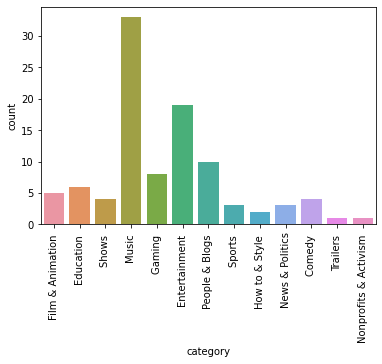

In [77]:
sns.countplot(x='category',data=data)
plt.xticks(rotation=90);

In [78]:
cat

Index(['youtuber', 'category'], dtype='object')

In [79]:
num

Index(['rank', 'subscribers', 'video views', 'video count', 'started'], dtype='object')

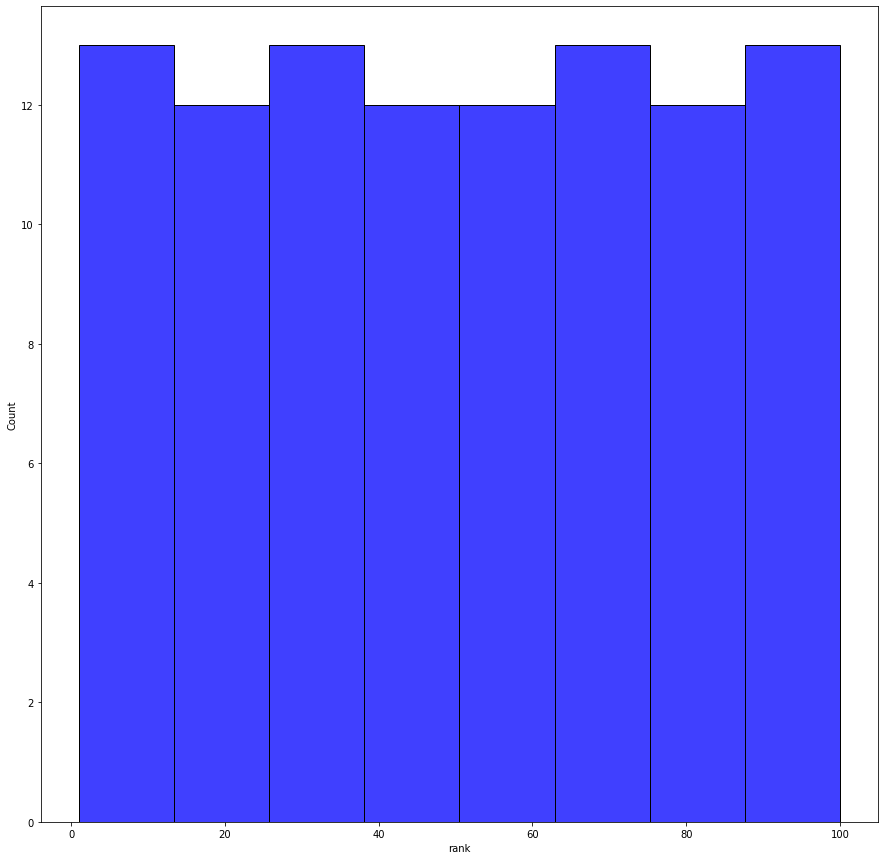

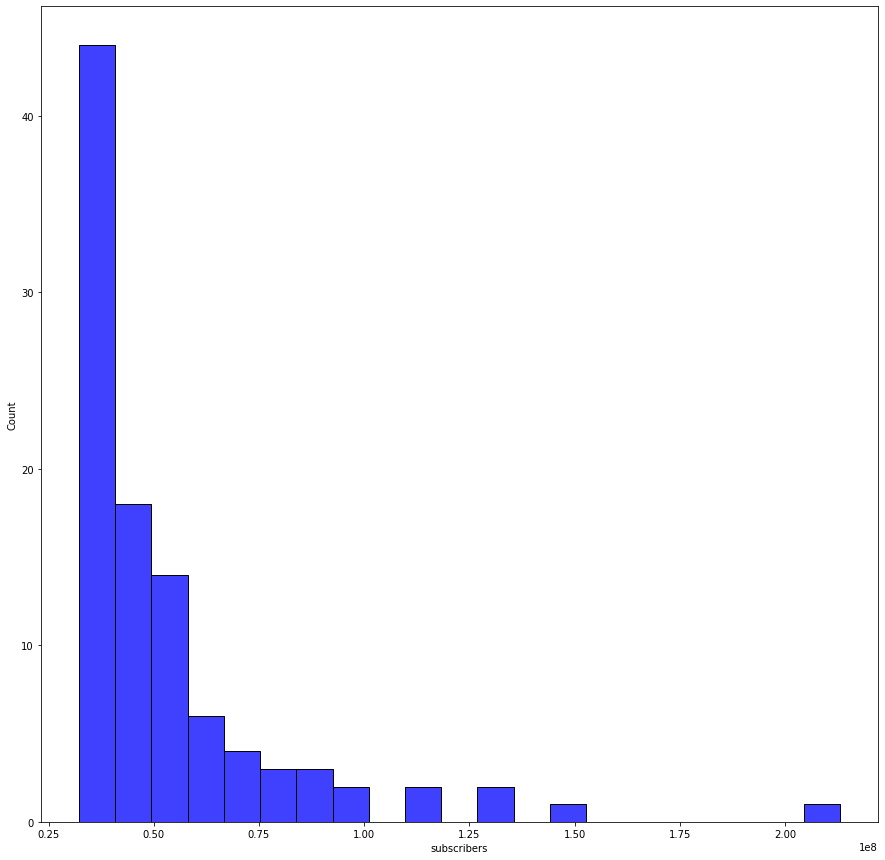

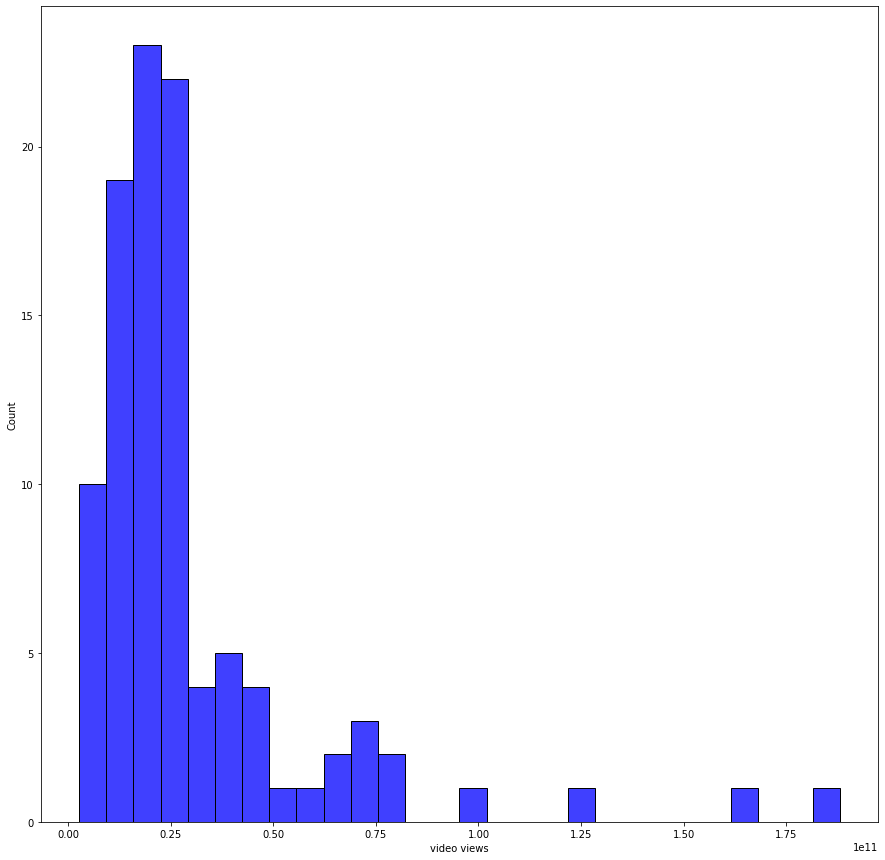

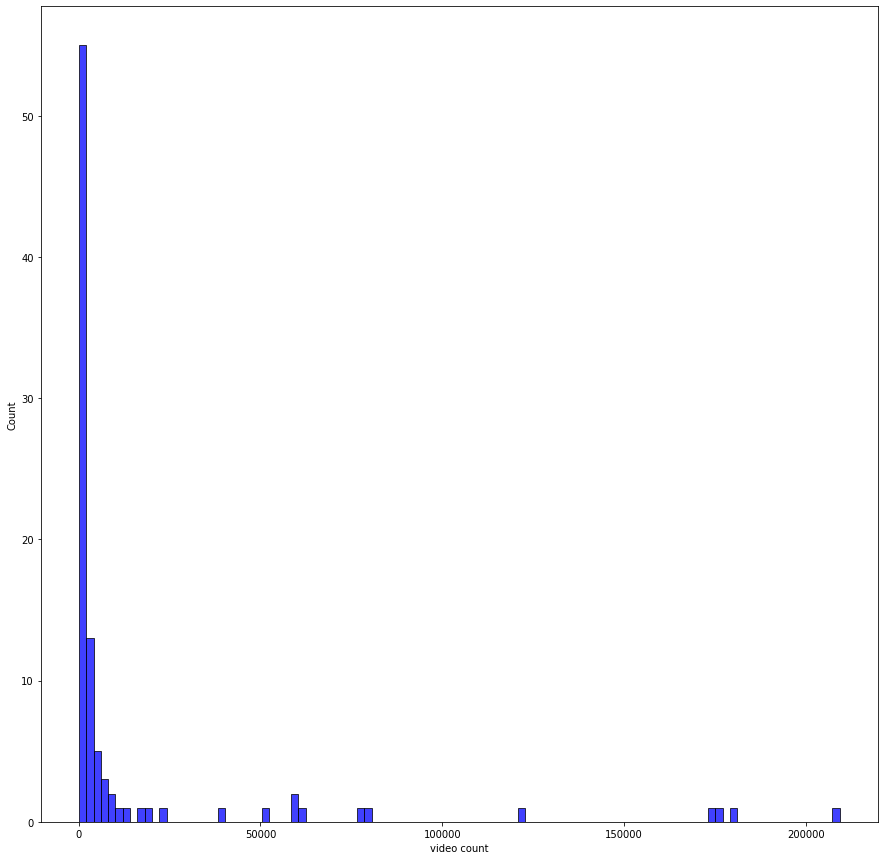

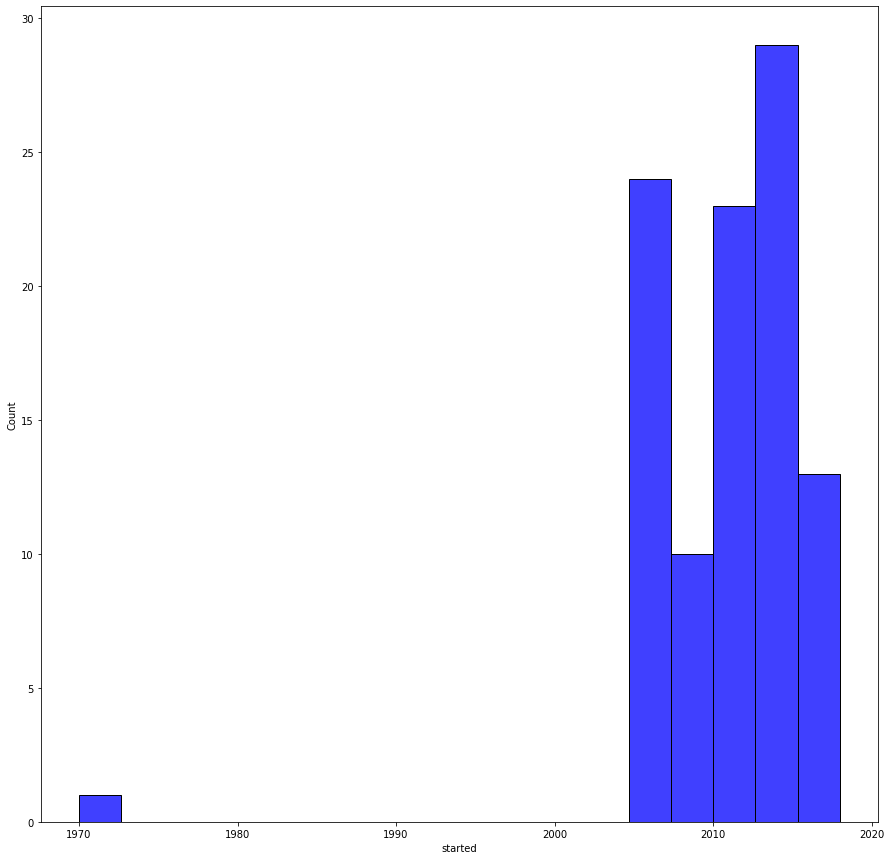

In [80]:
def univar(a):
  for col in num:
    plt.figure(figsize=(15,15))
    sns.histplot(x=data[col],color="blue")

univar(data)

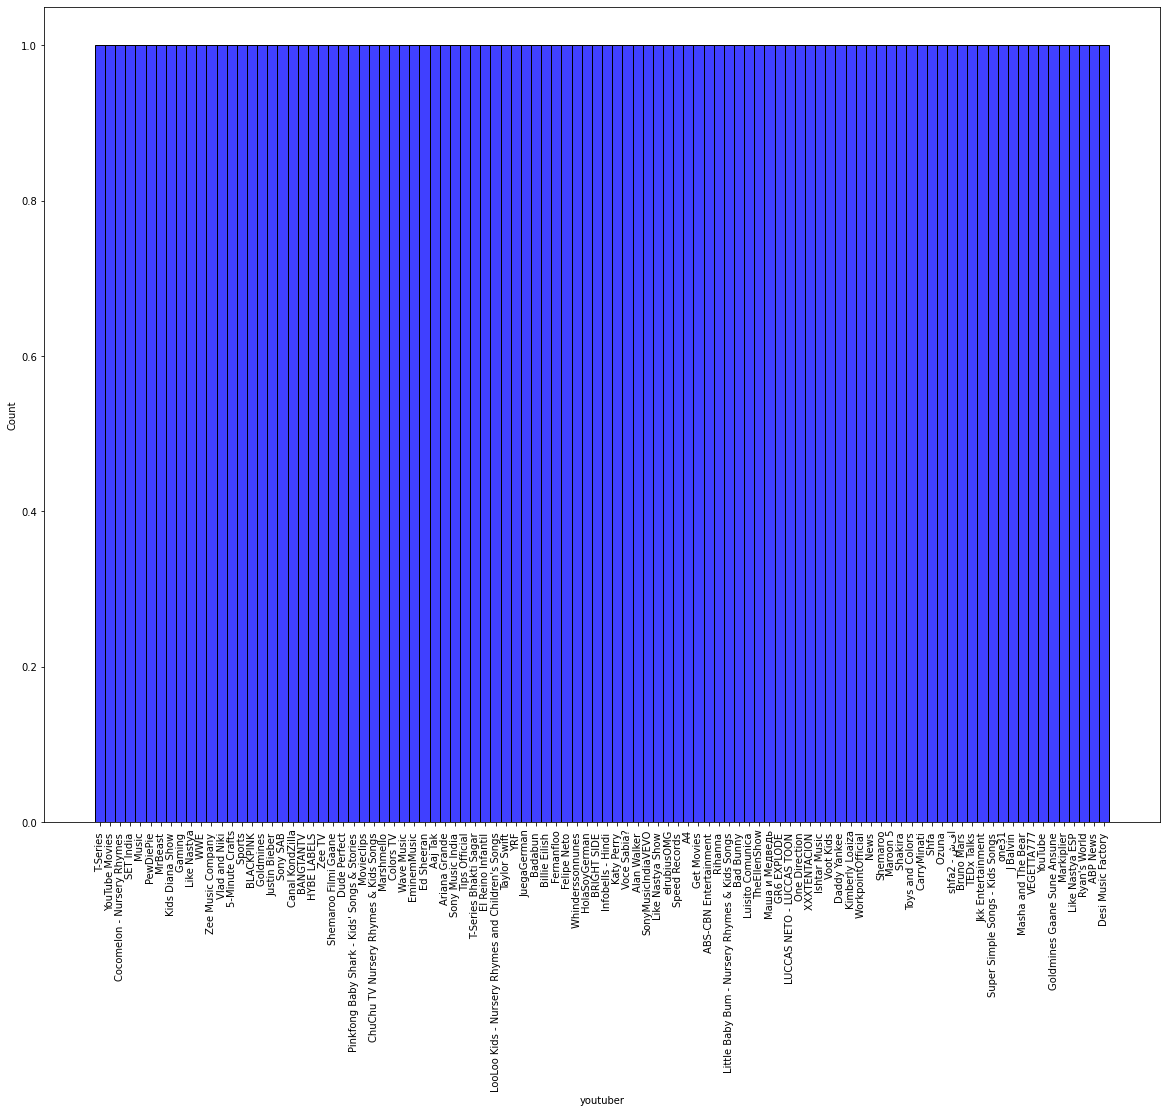

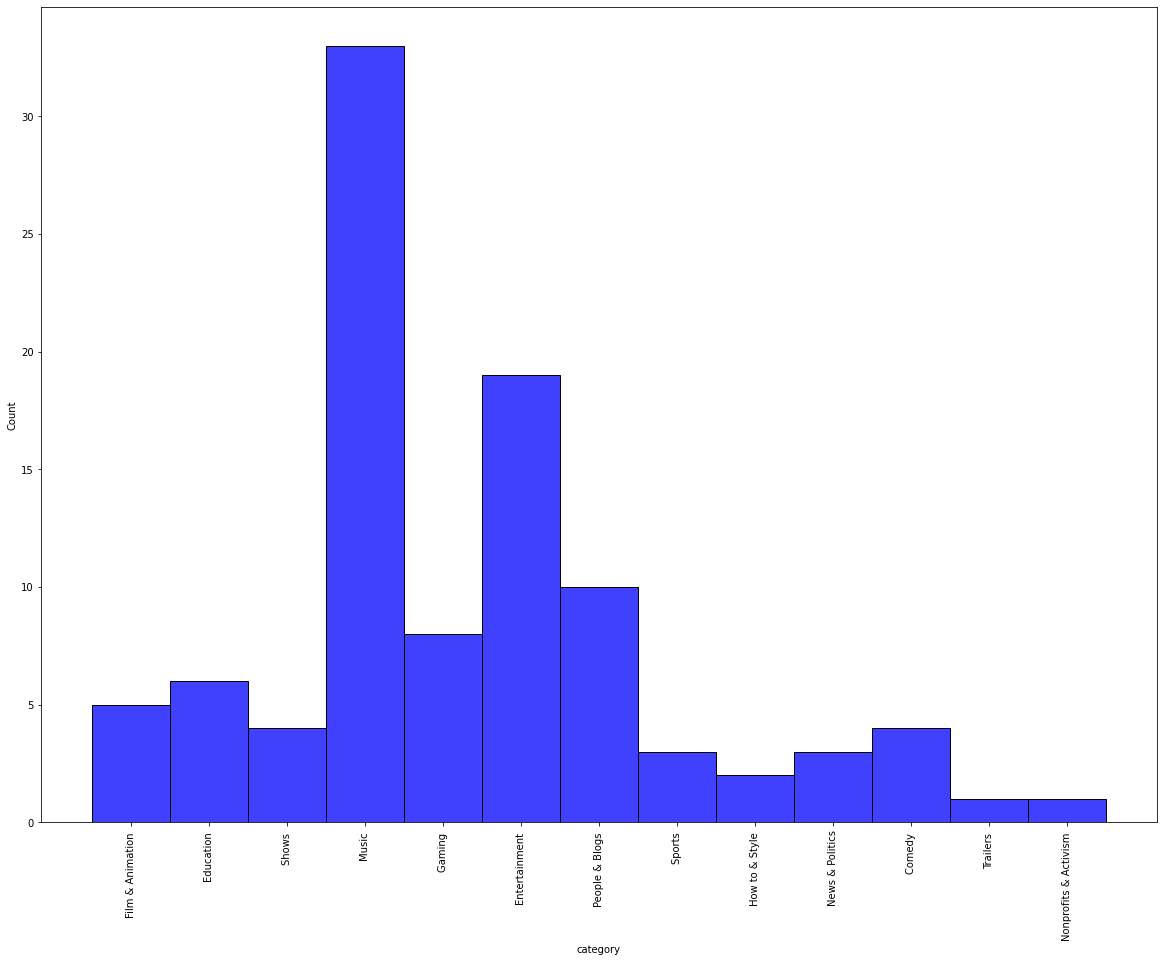

In [81]:
def bivar(a):
  for col1 in cat:
    plt.figure(figsize=(20,15))
    sns.histplot(x=data[col1],color="blue")
    plt.xticks(rotation=90)
bivar(data)

**BI-VARIATE FOR NUMERICAL TO NUMERICAL**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

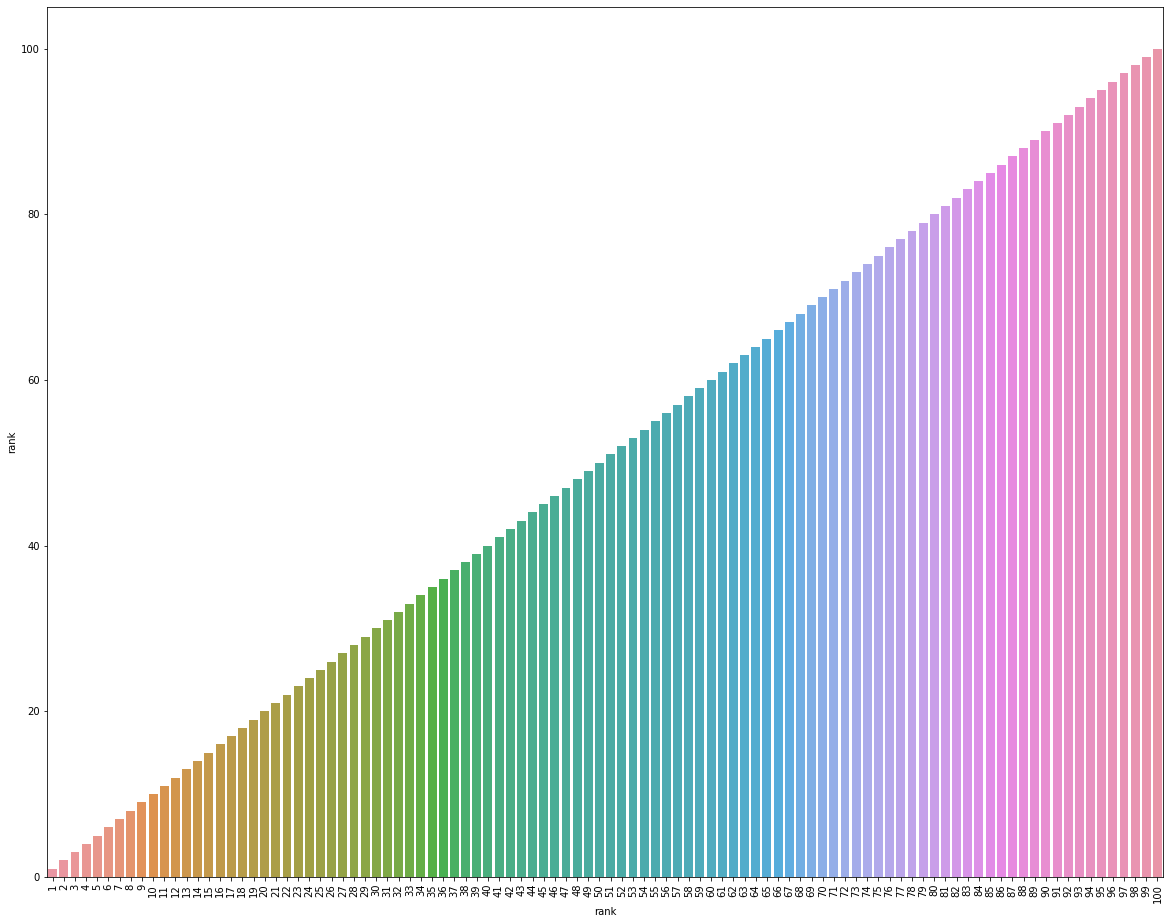

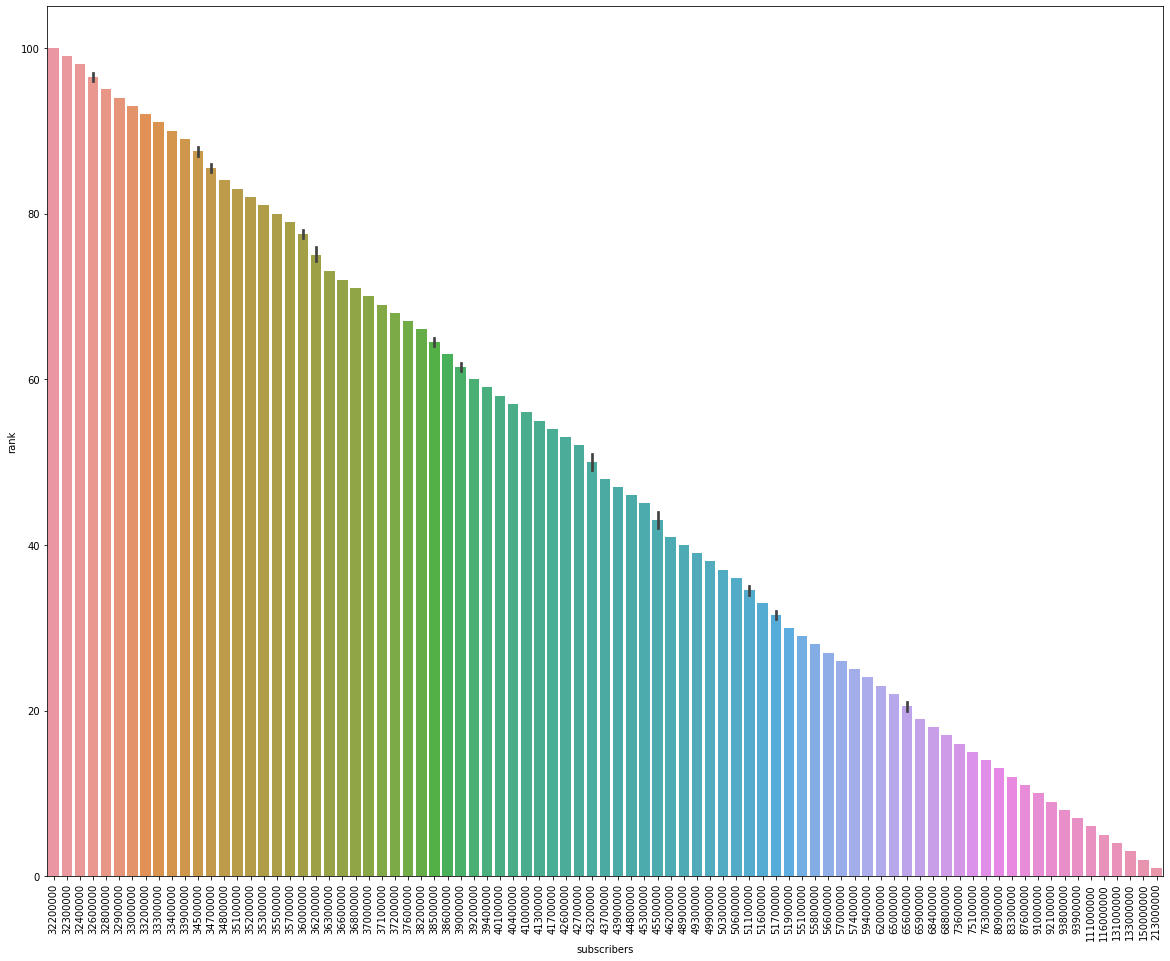

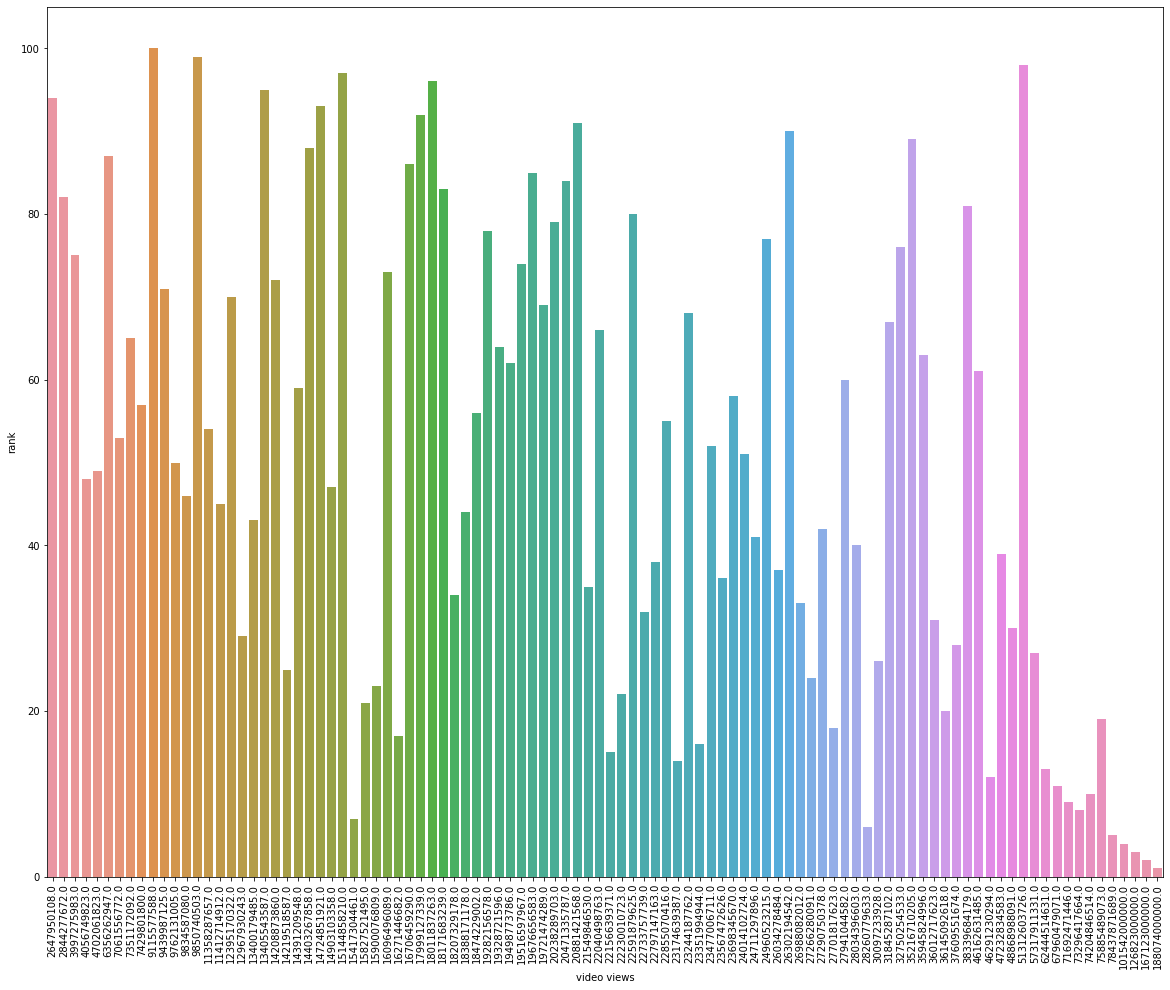

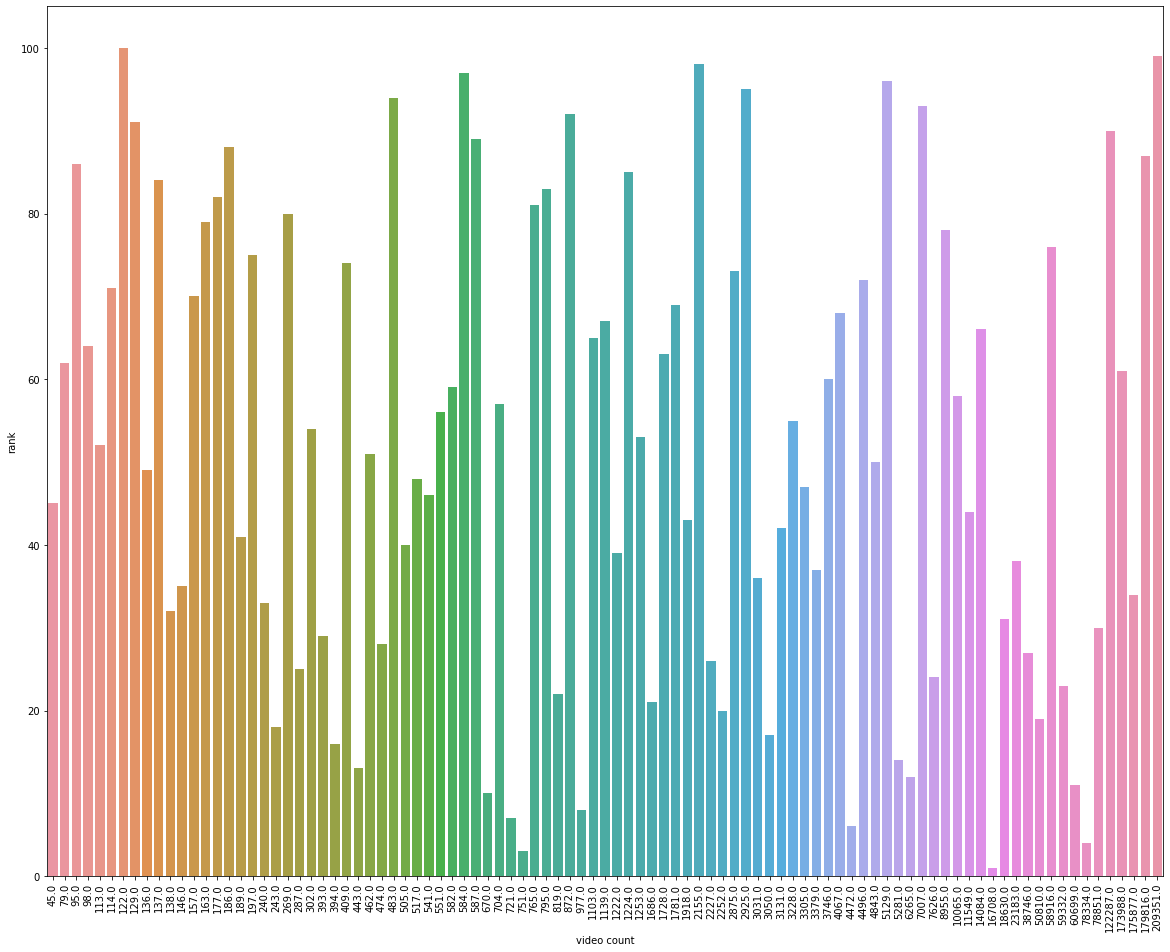

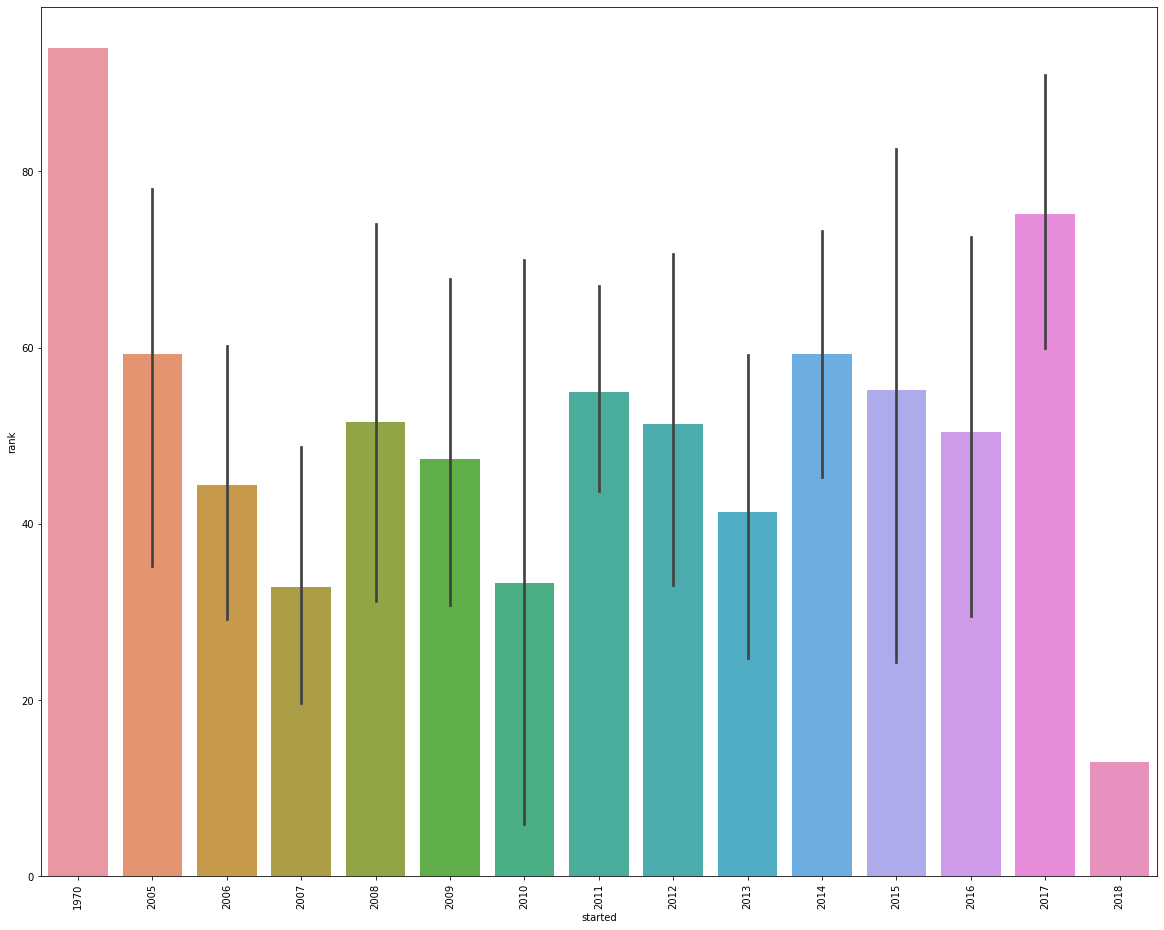

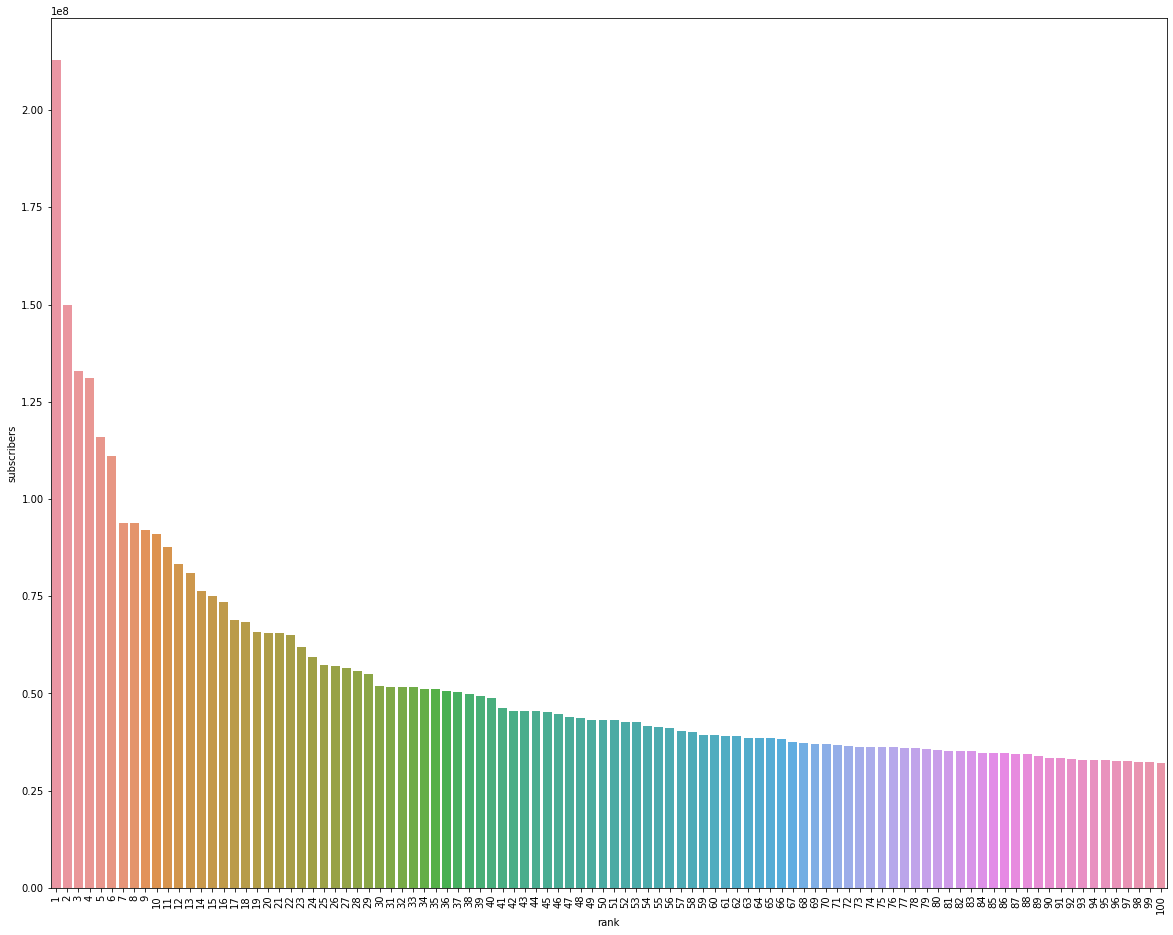

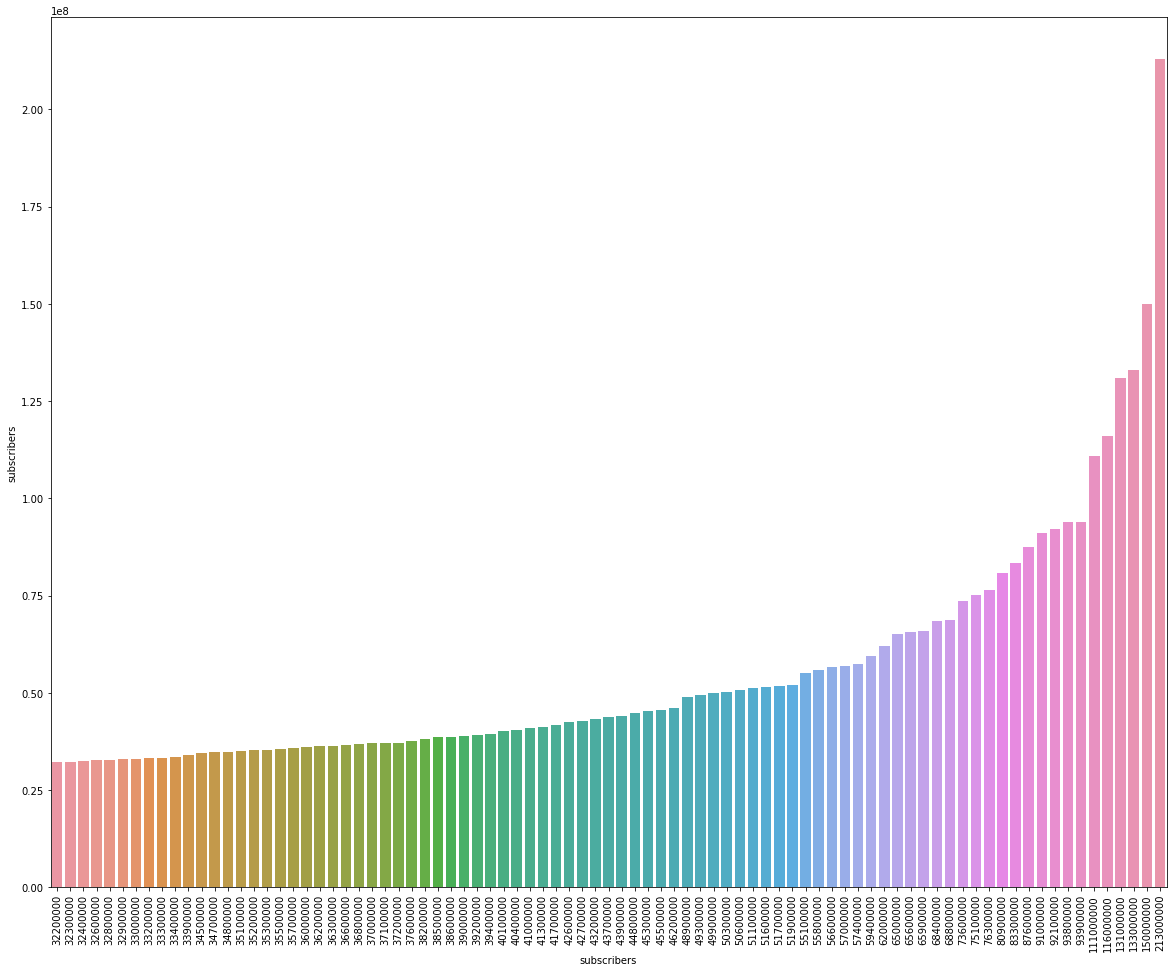

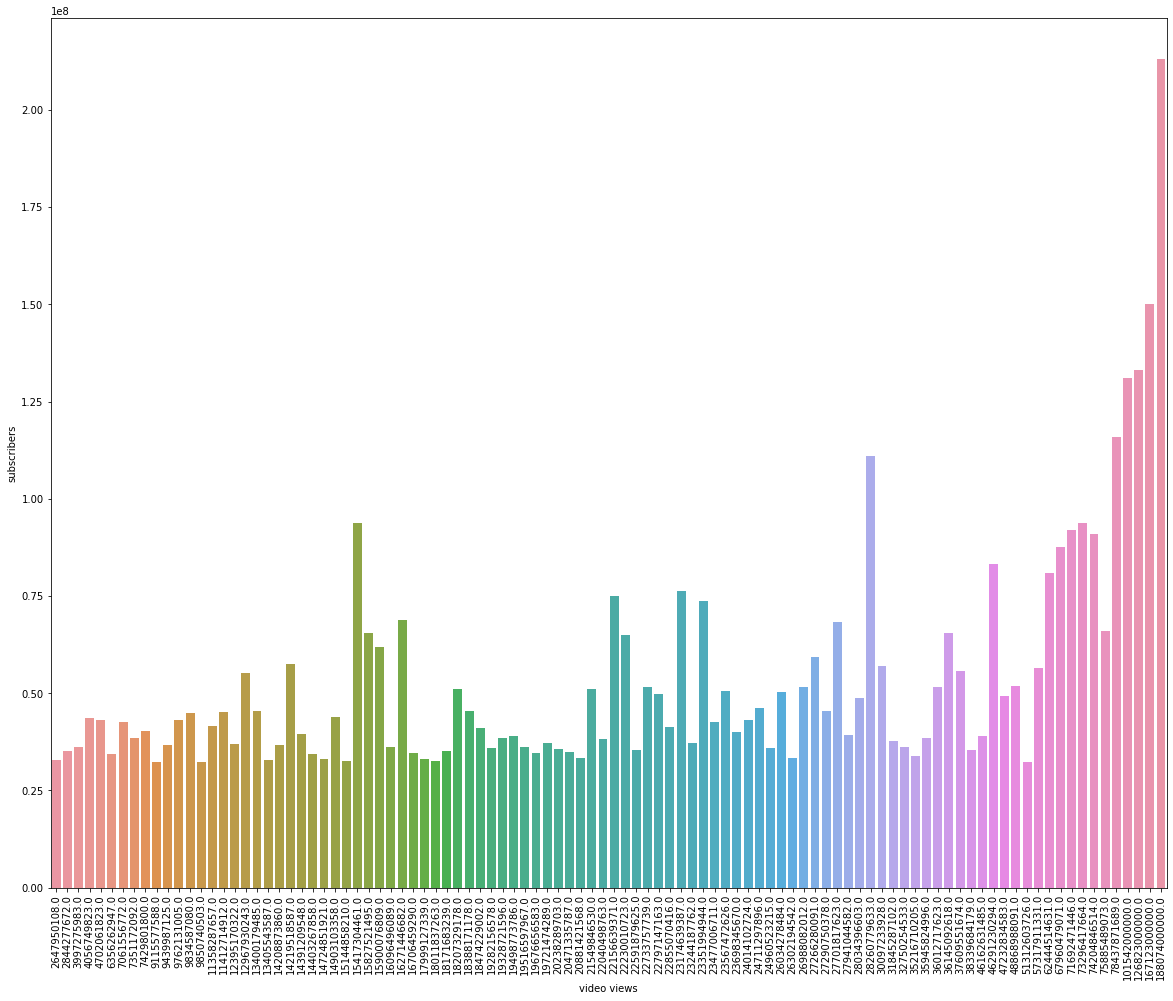

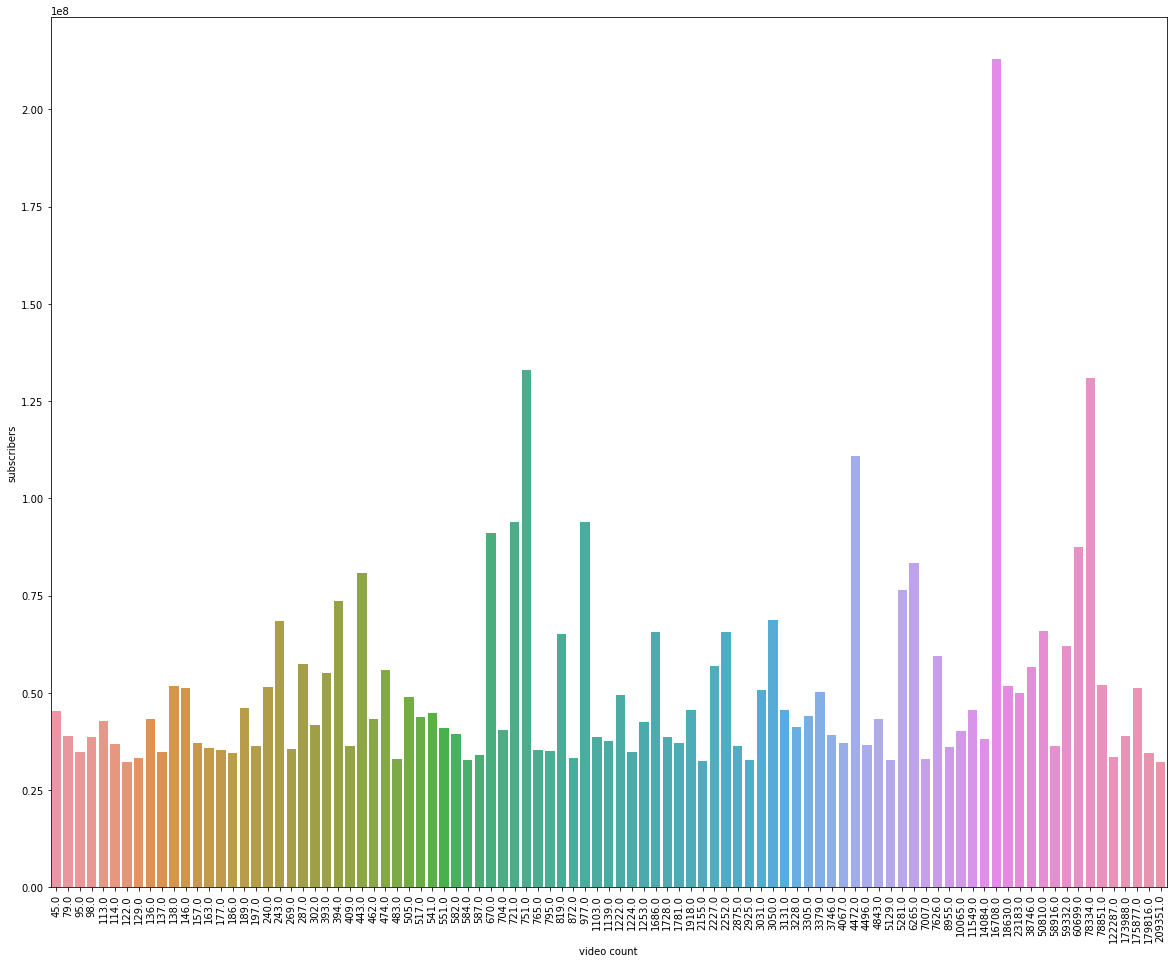

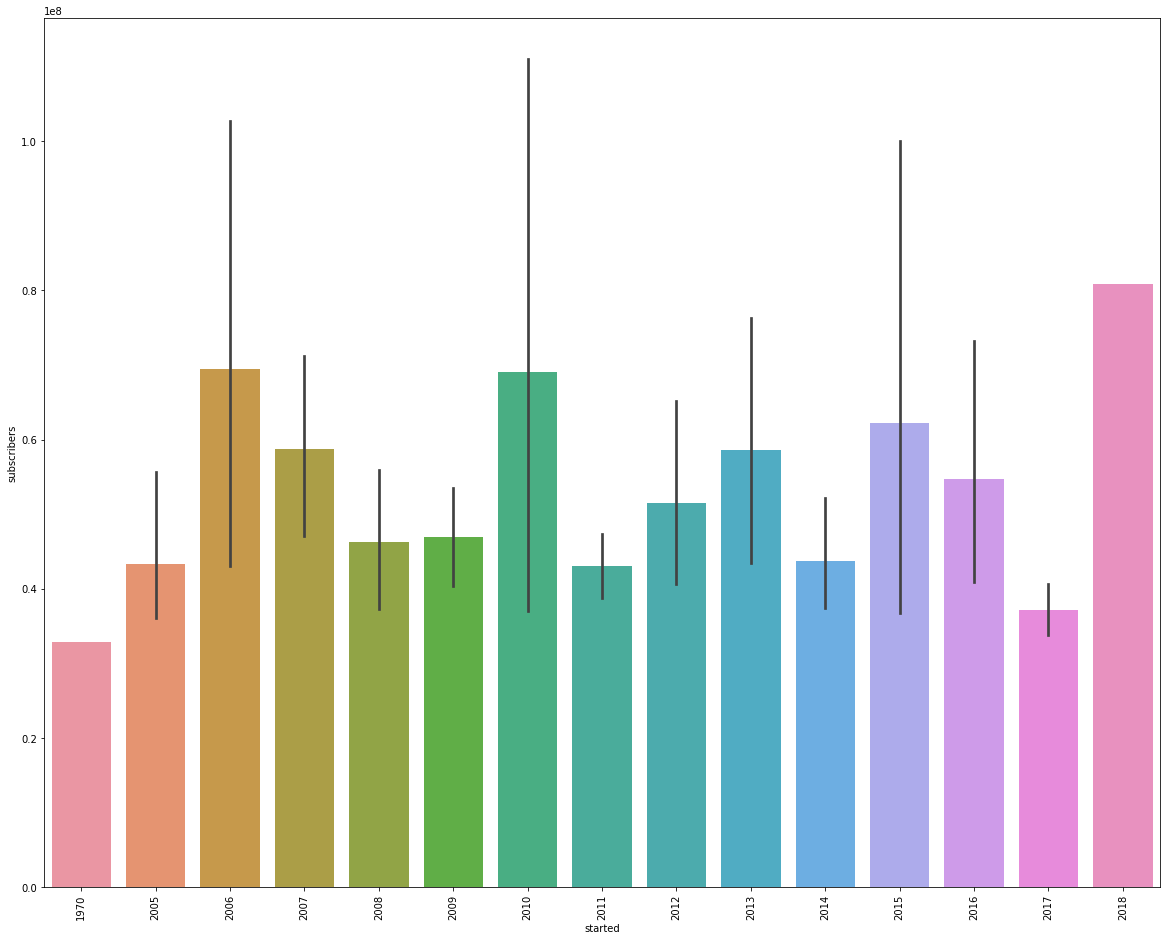

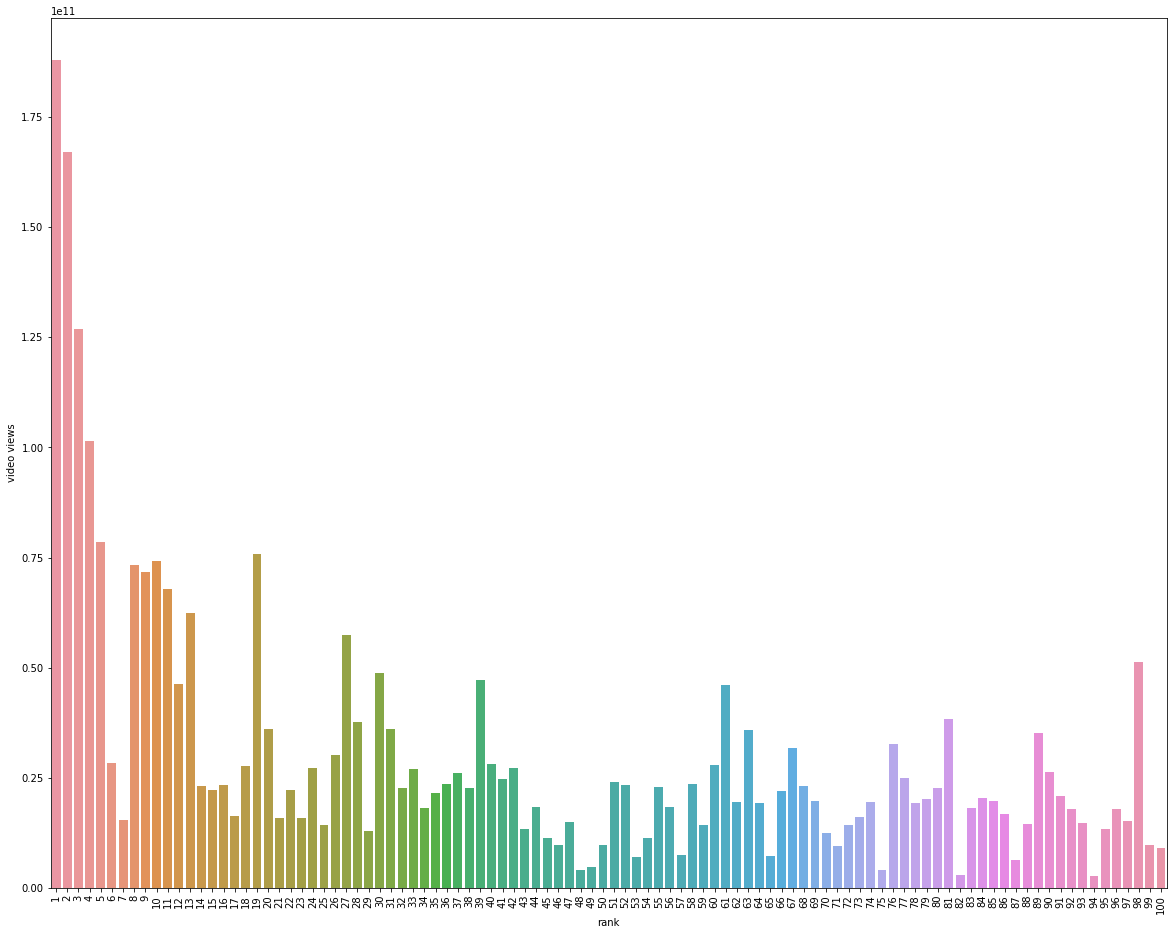

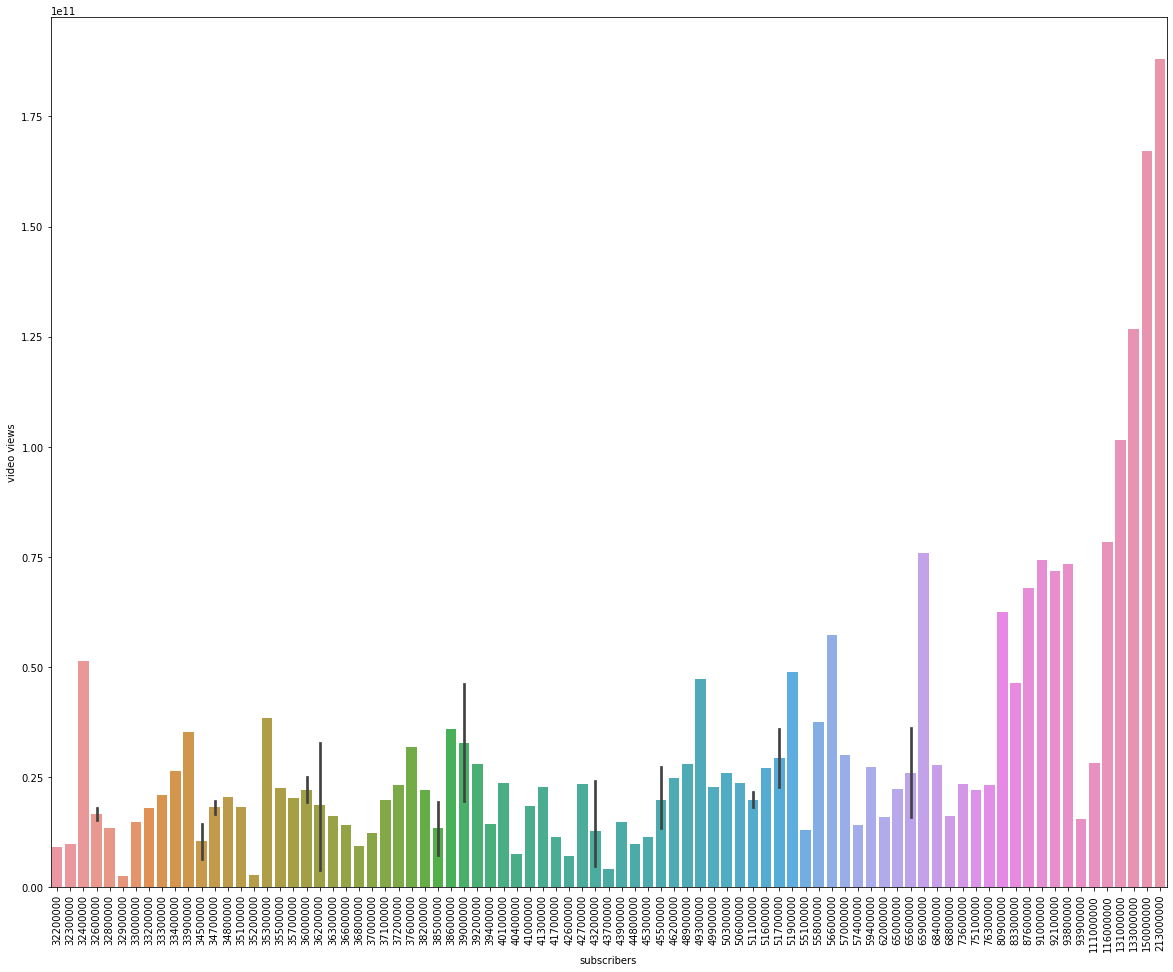

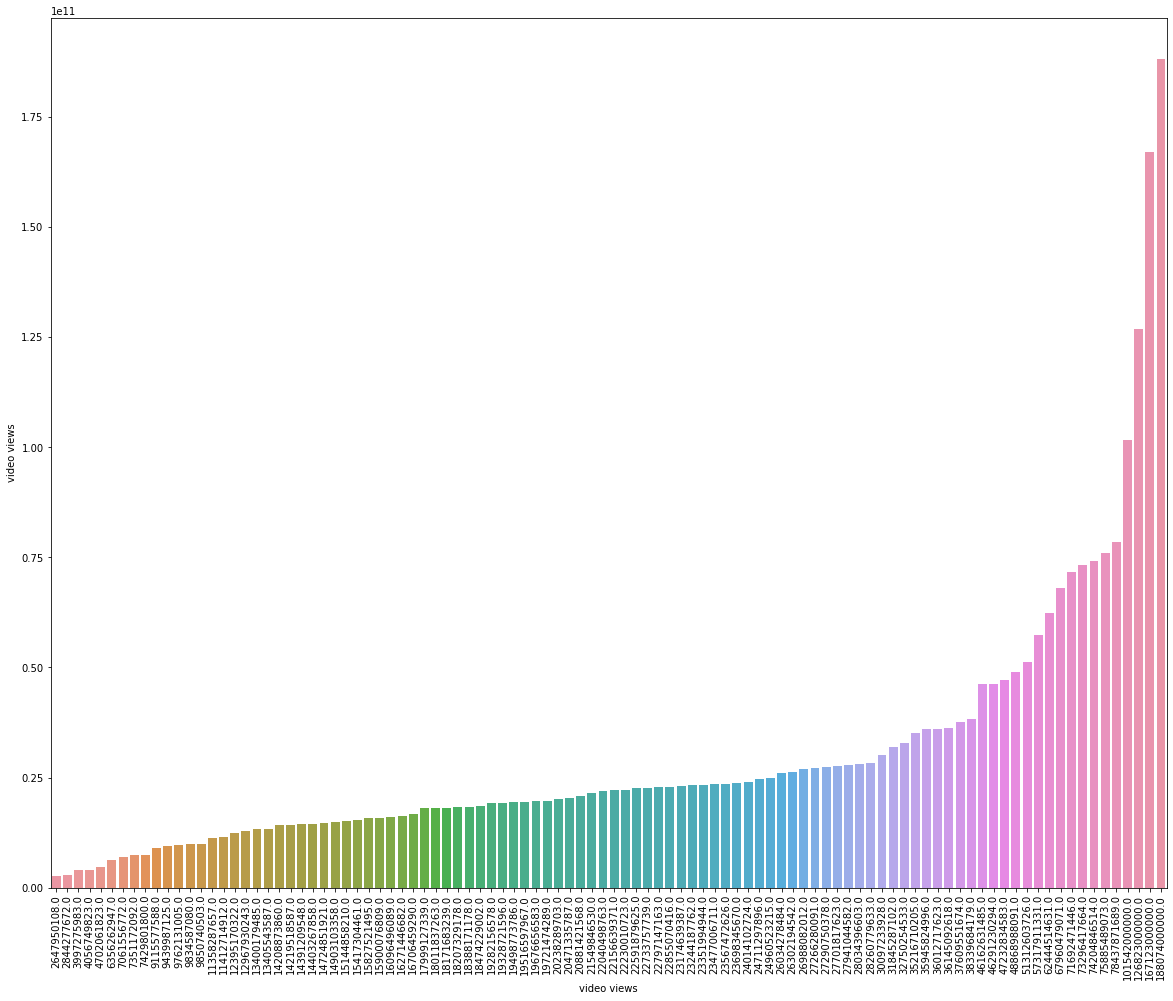

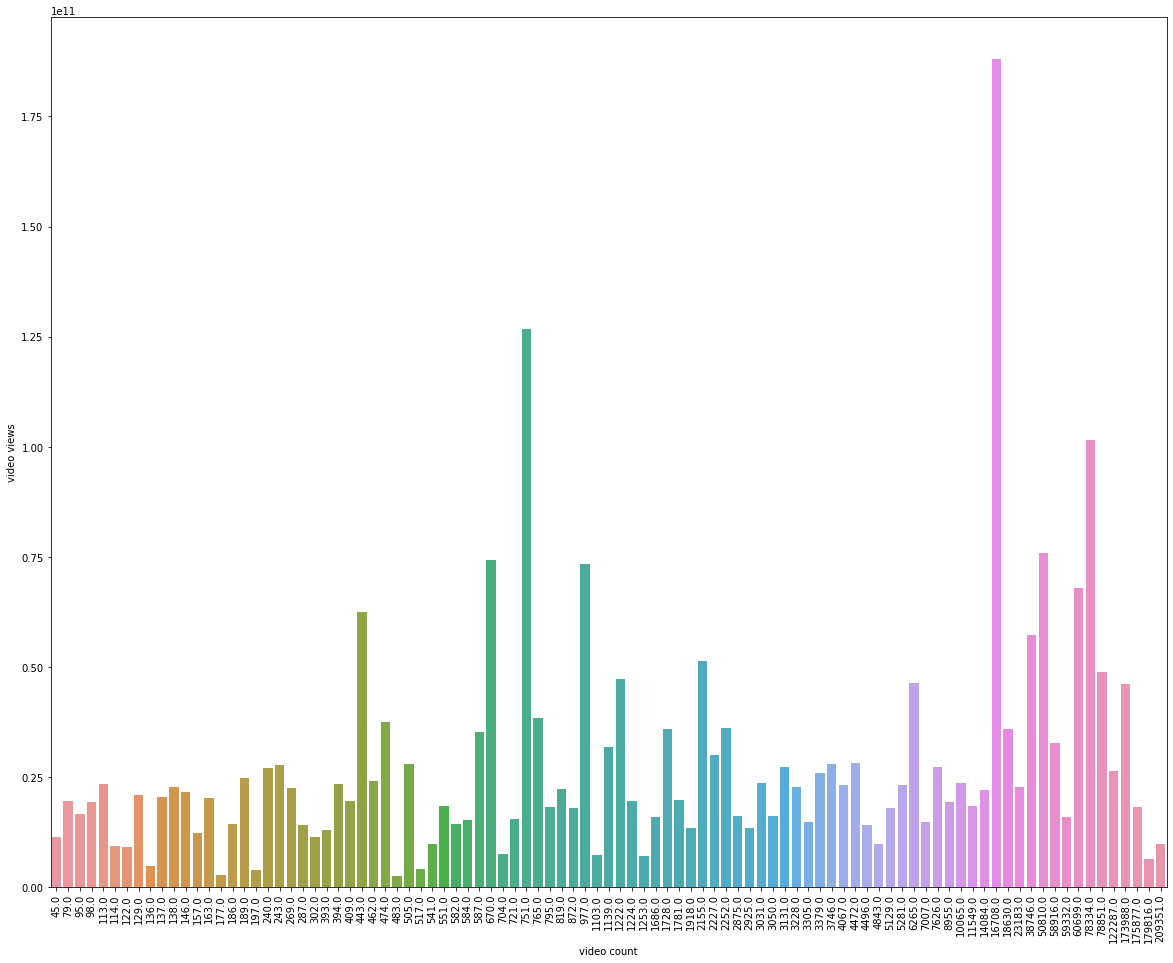

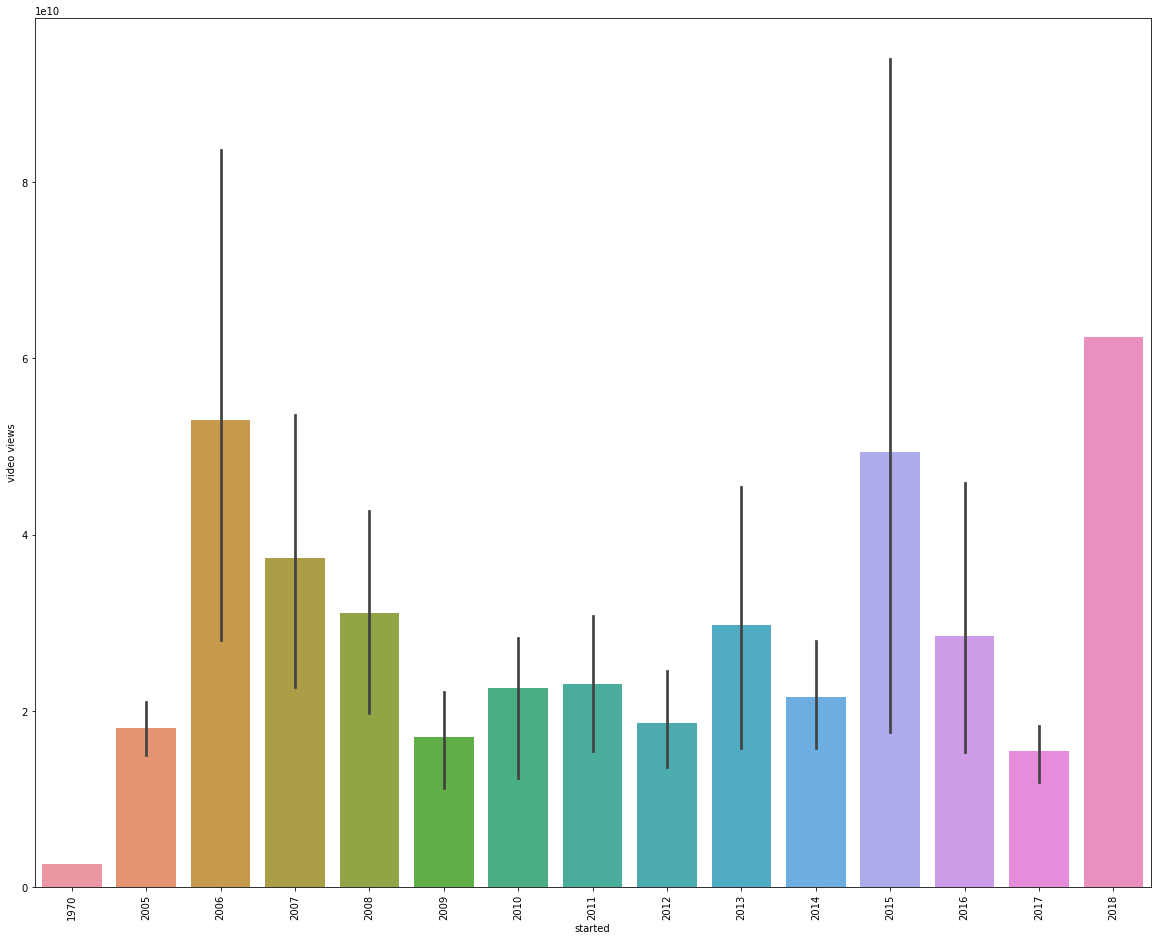

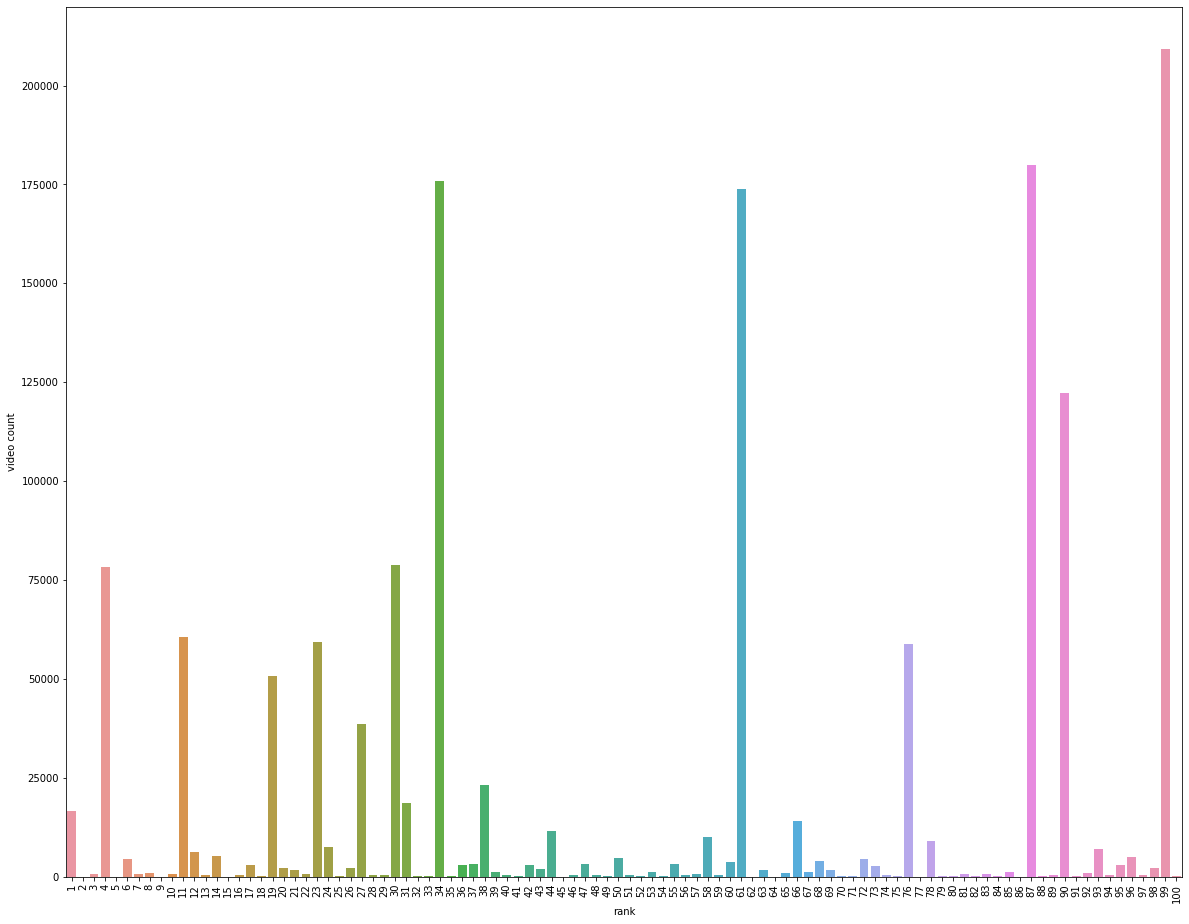

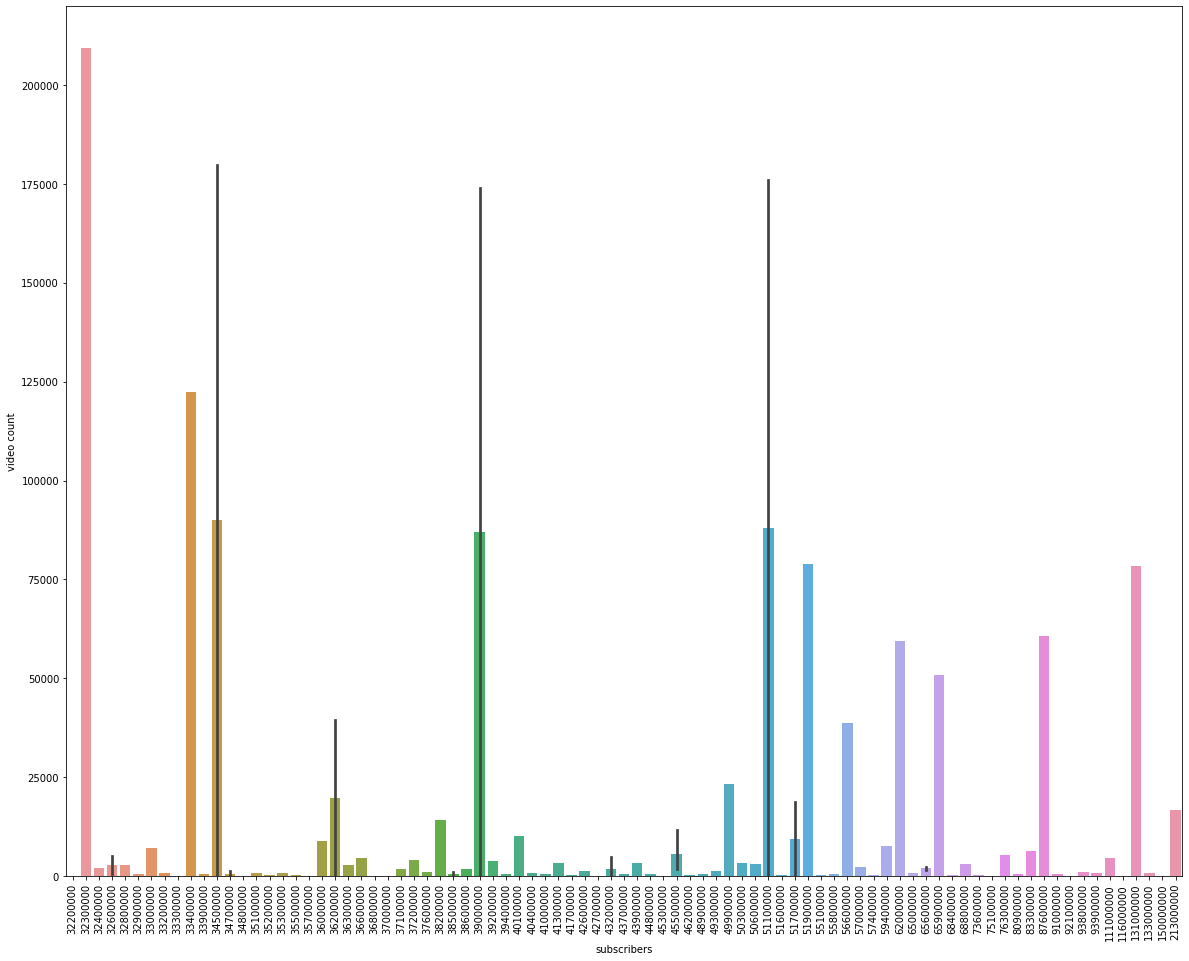

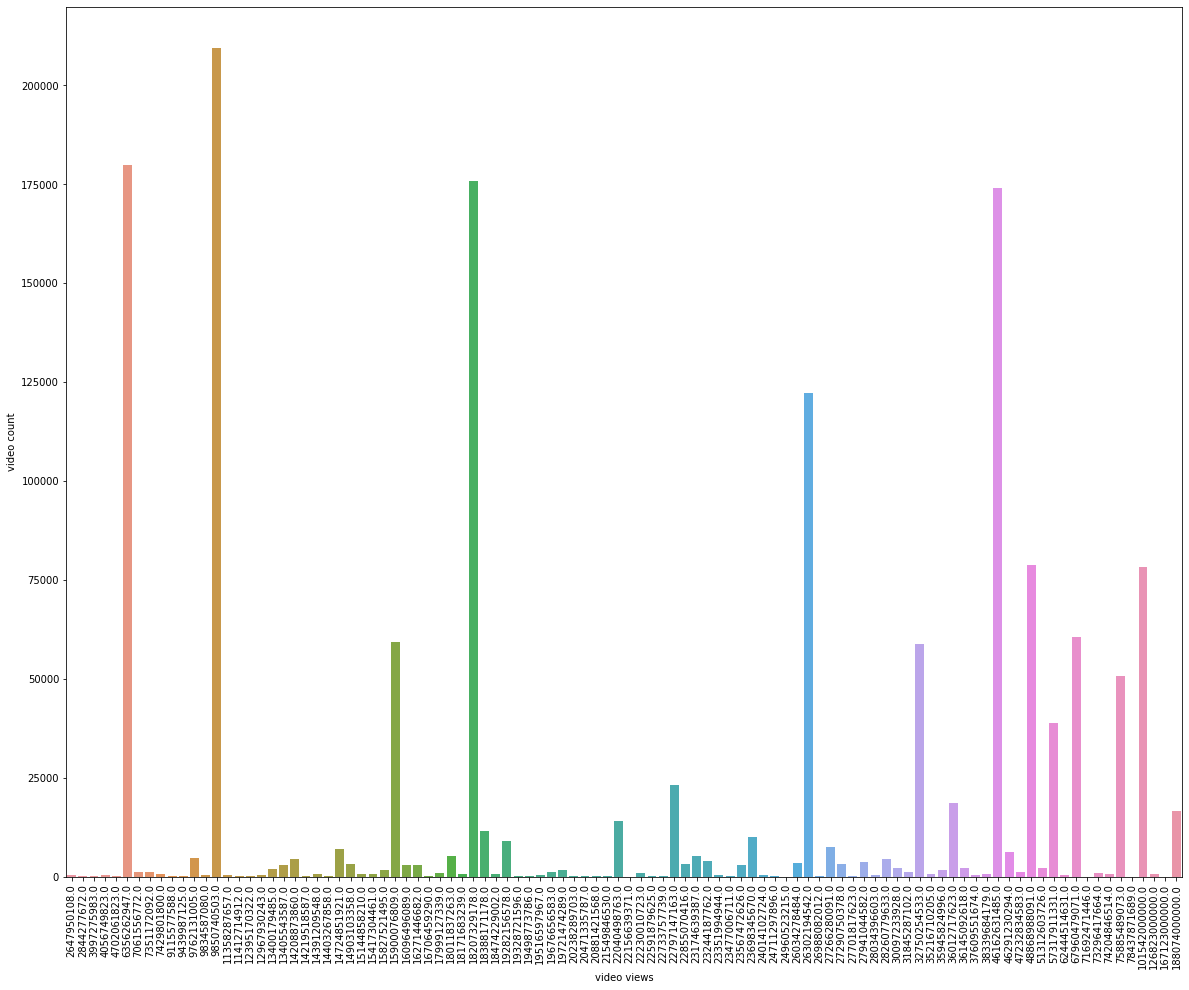

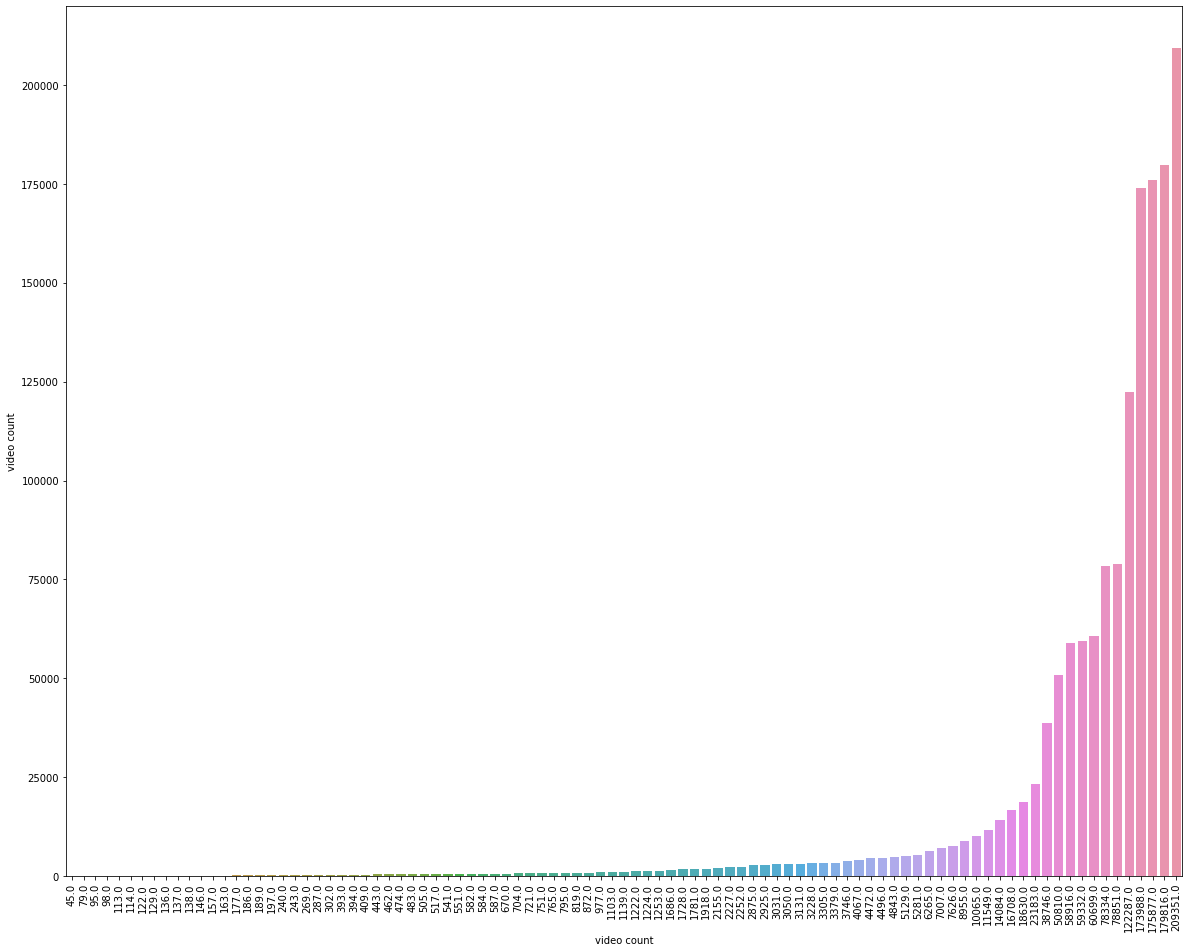

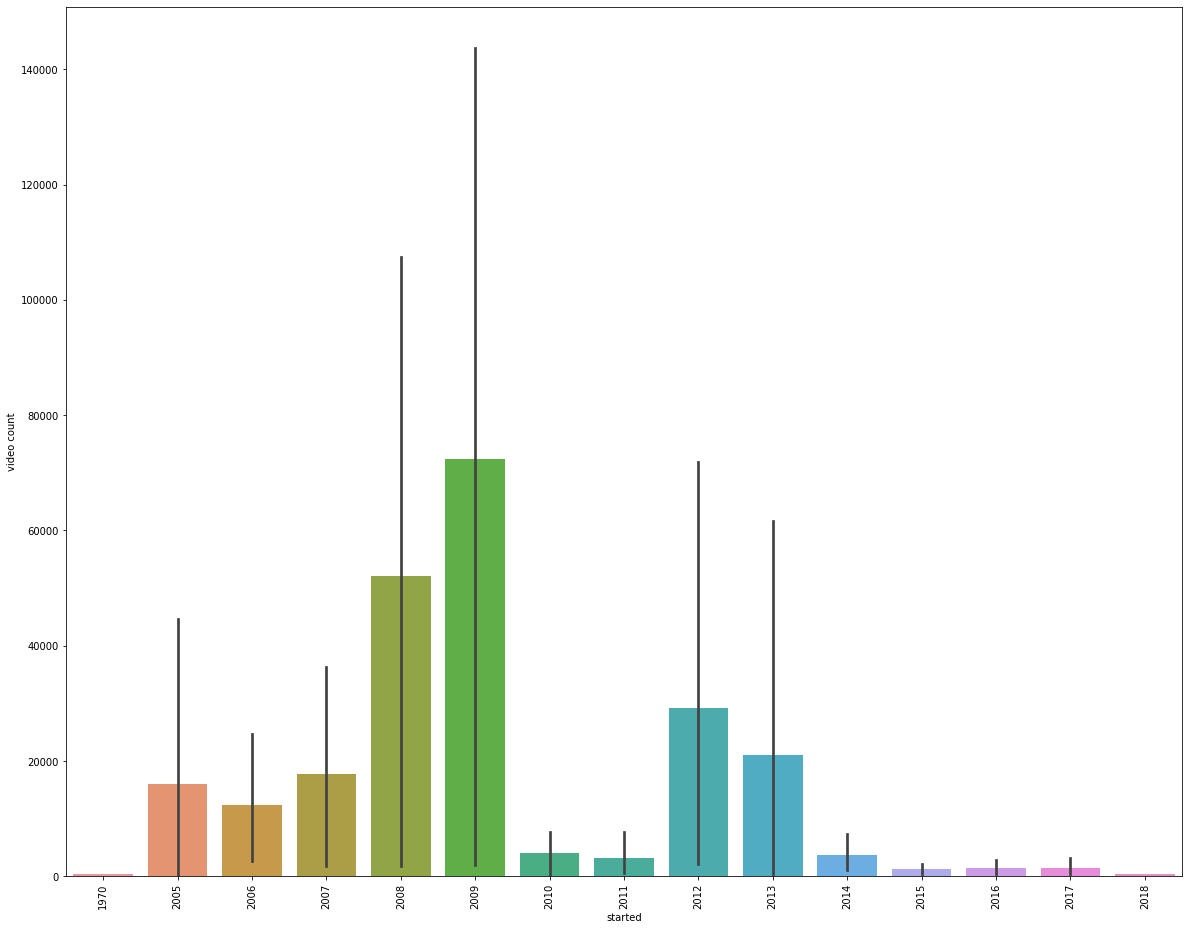

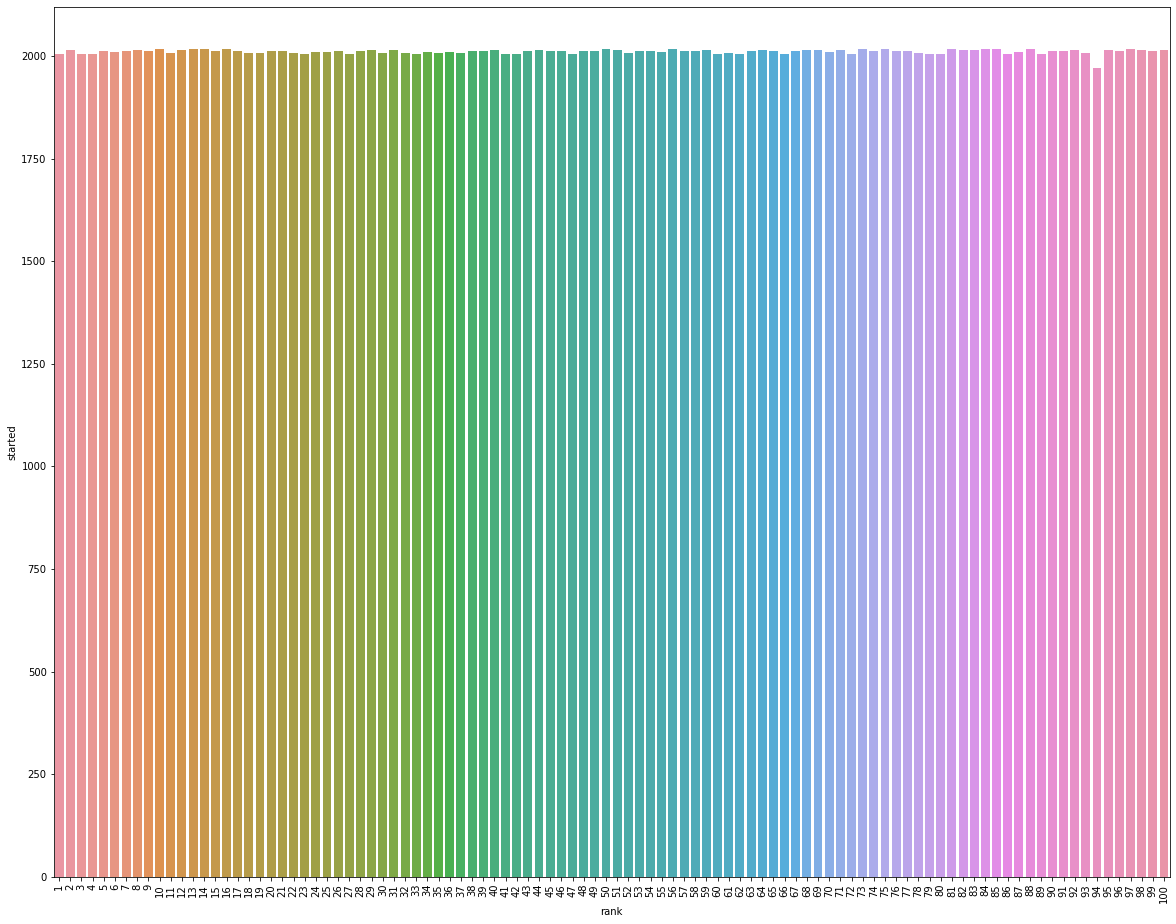

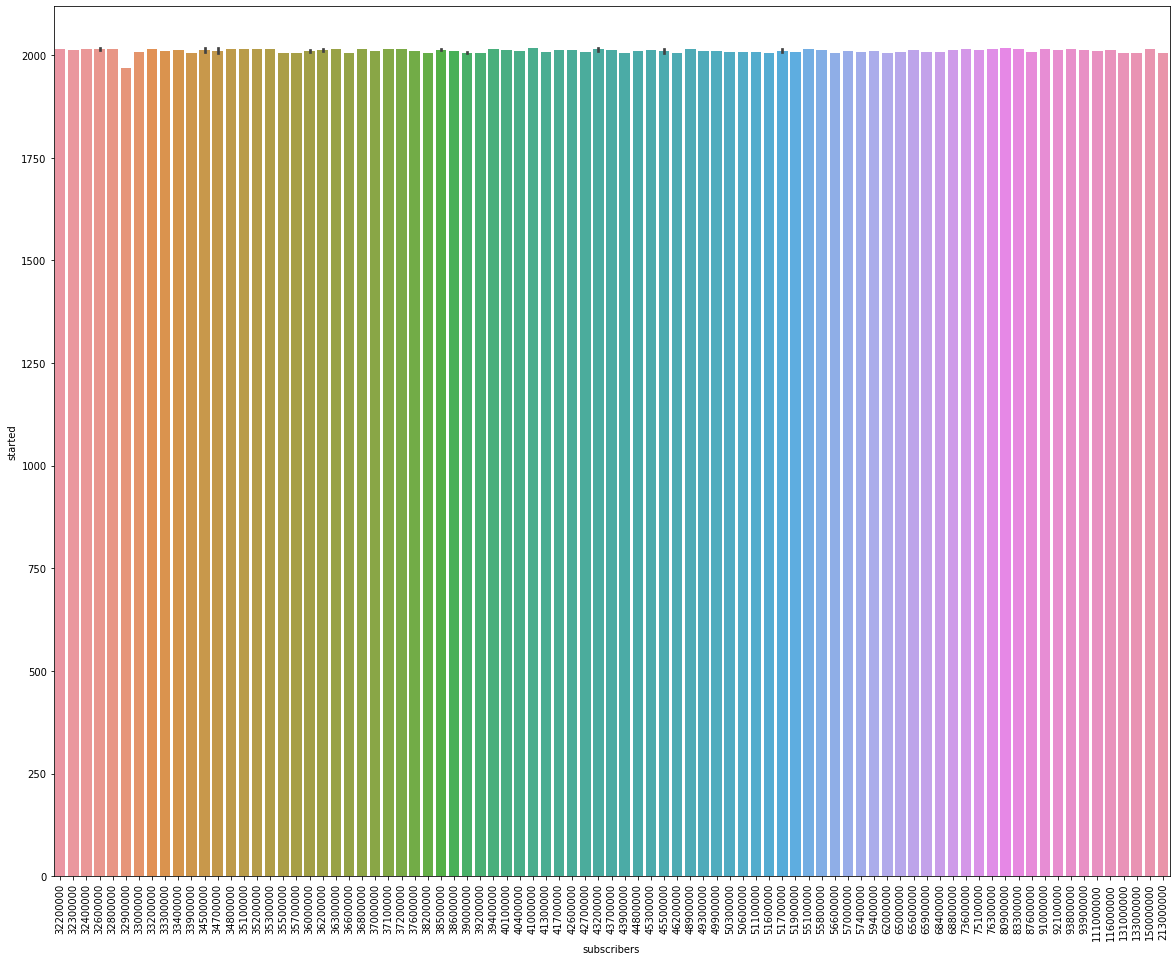

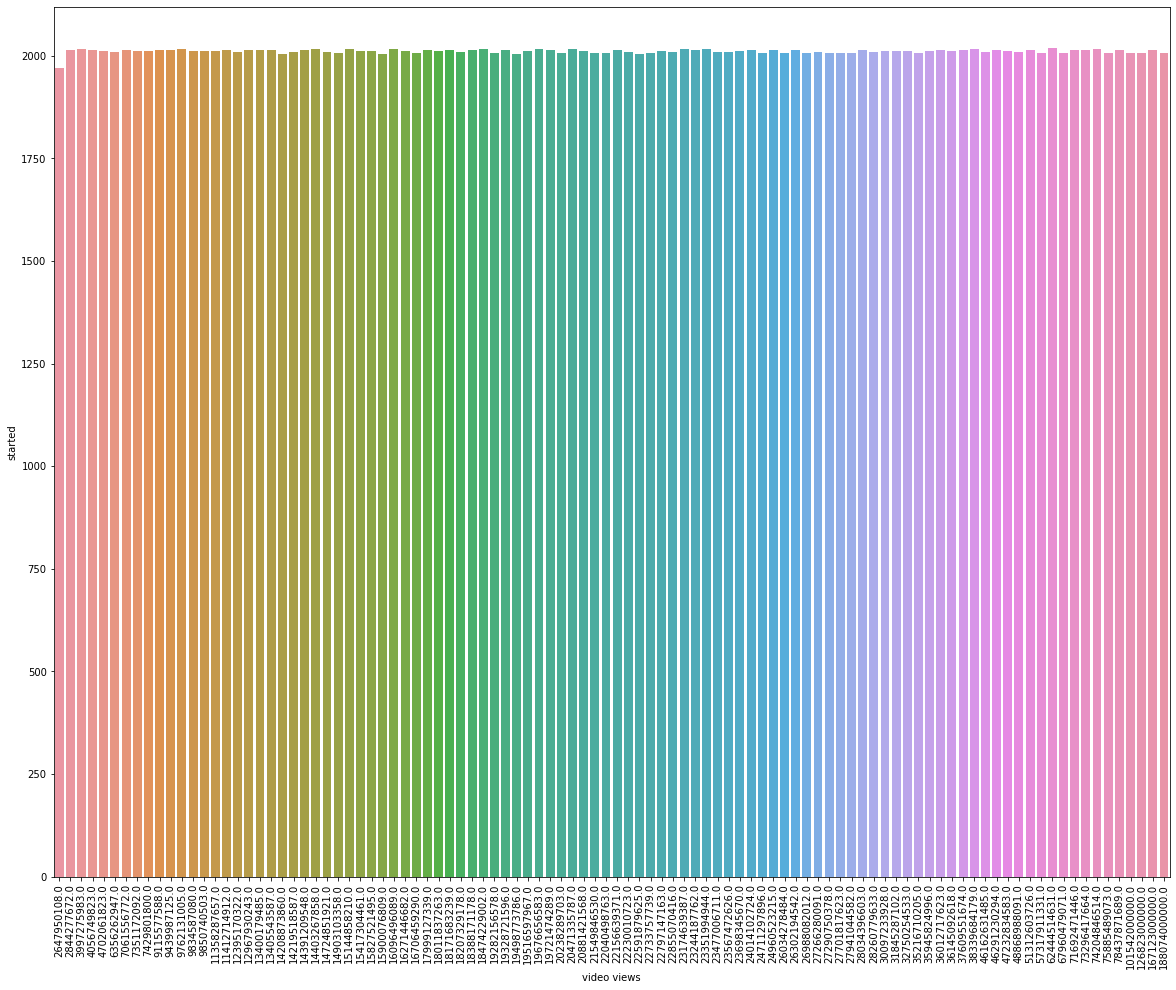

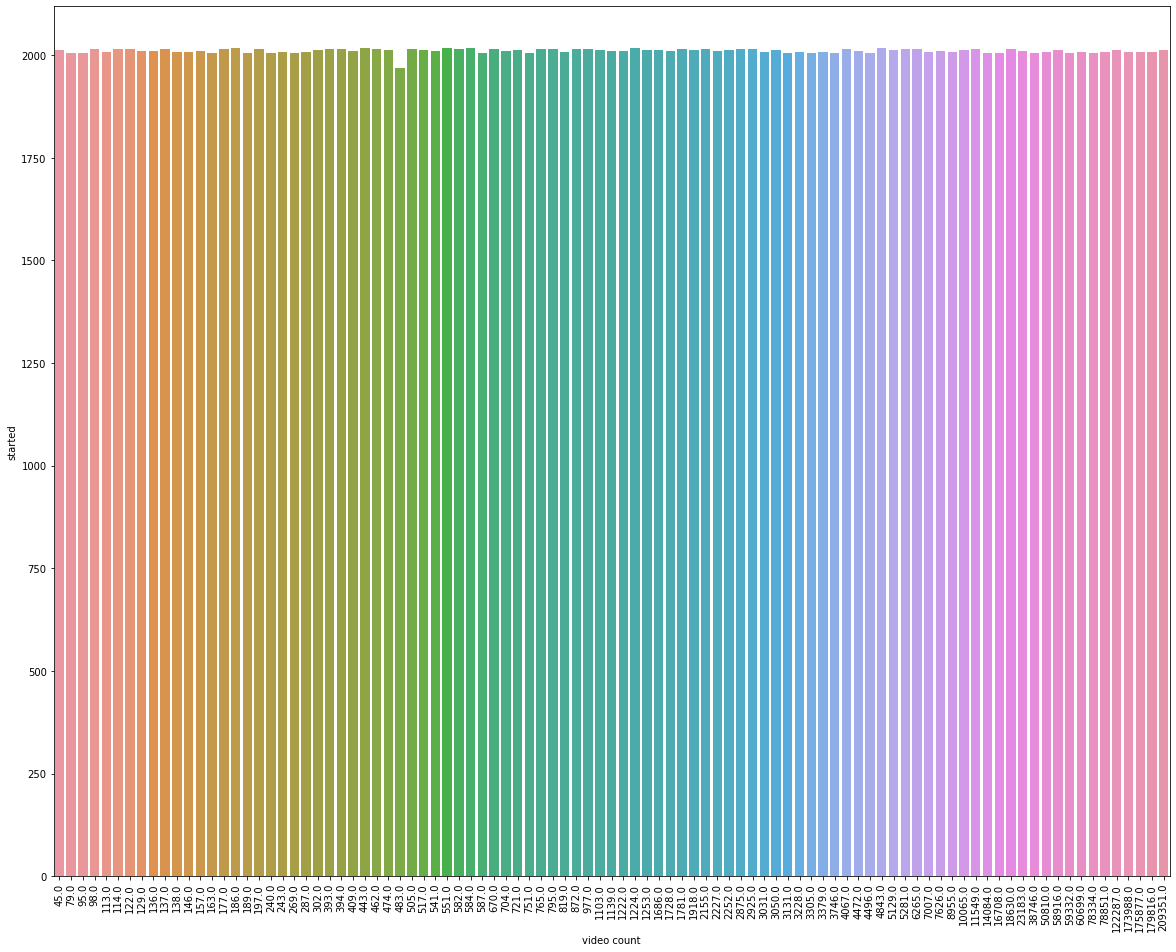

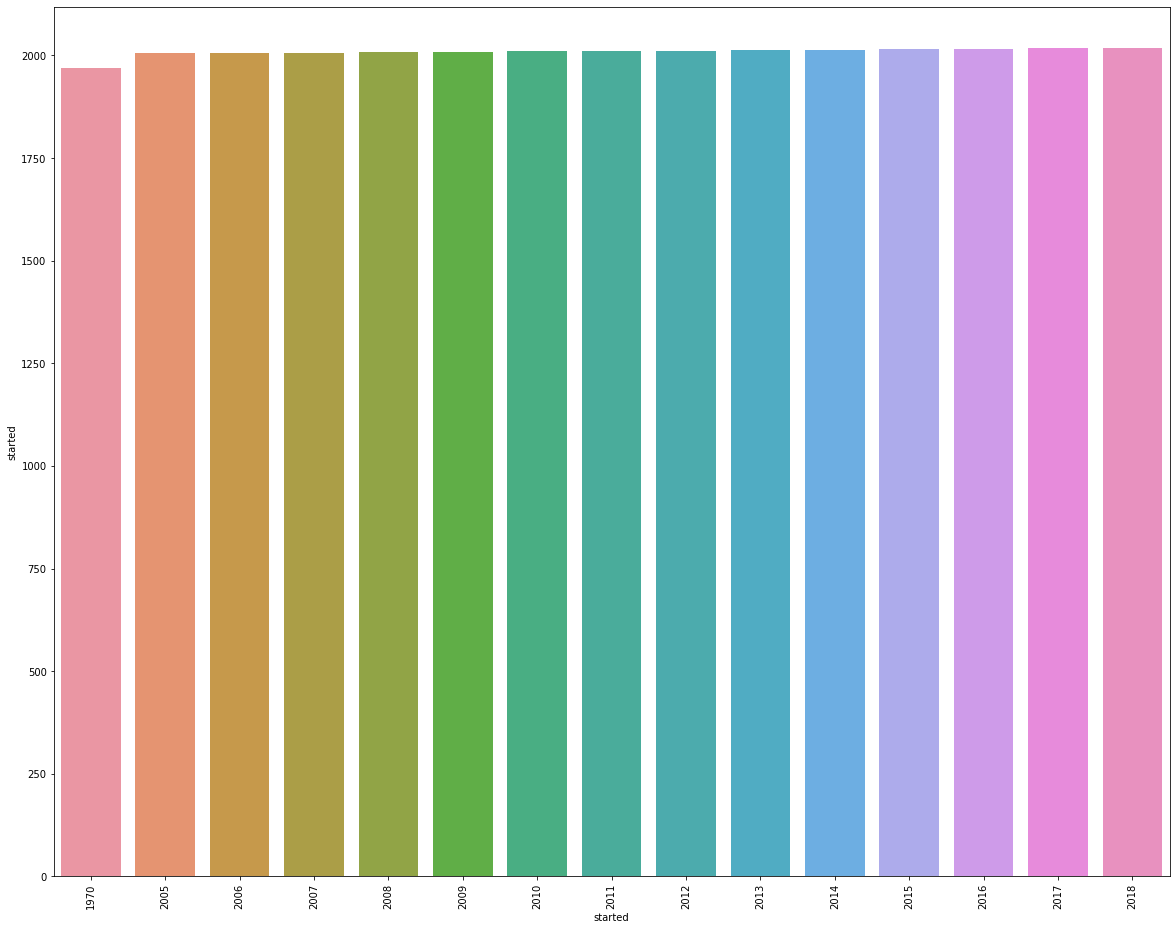

In [82]:
def unibi(a):
  for col in num:
    for col1 in num:
       plt.figure(figsize=(20,16))
       sns.barplot(x=data[col1] ,y=data[col])
       plt.xticks(rotation=90);

unibi(data)

**BI-VARIATE FOR CATEGORICAL TO CATEGORICAL**

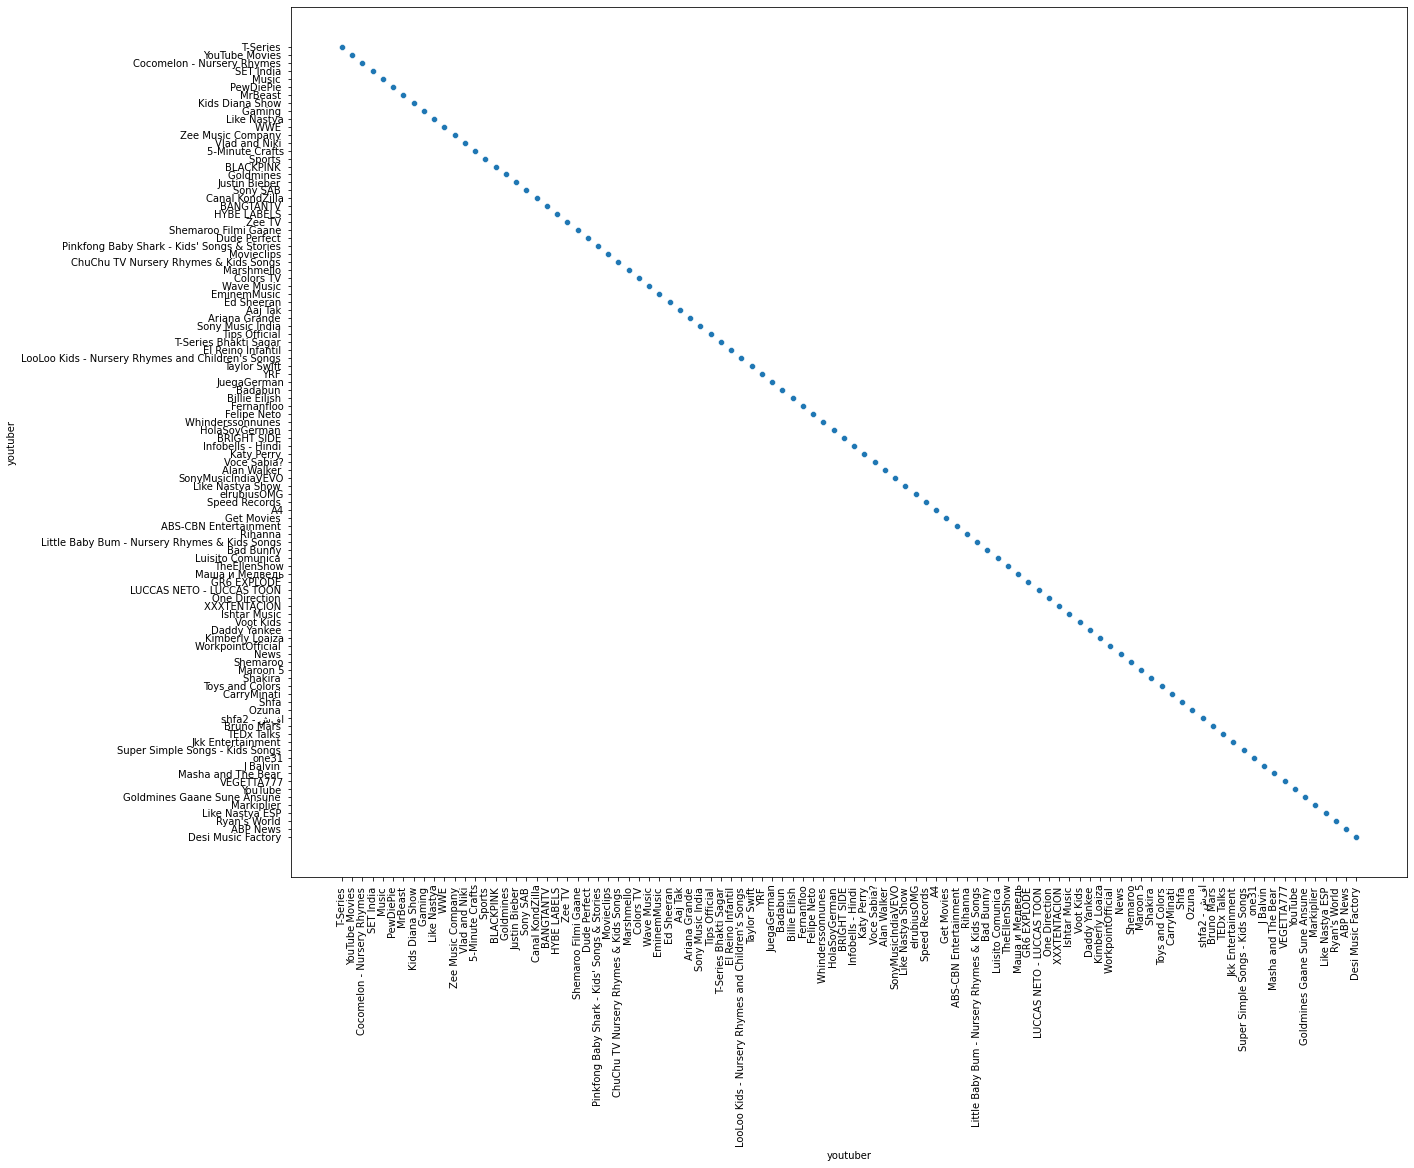

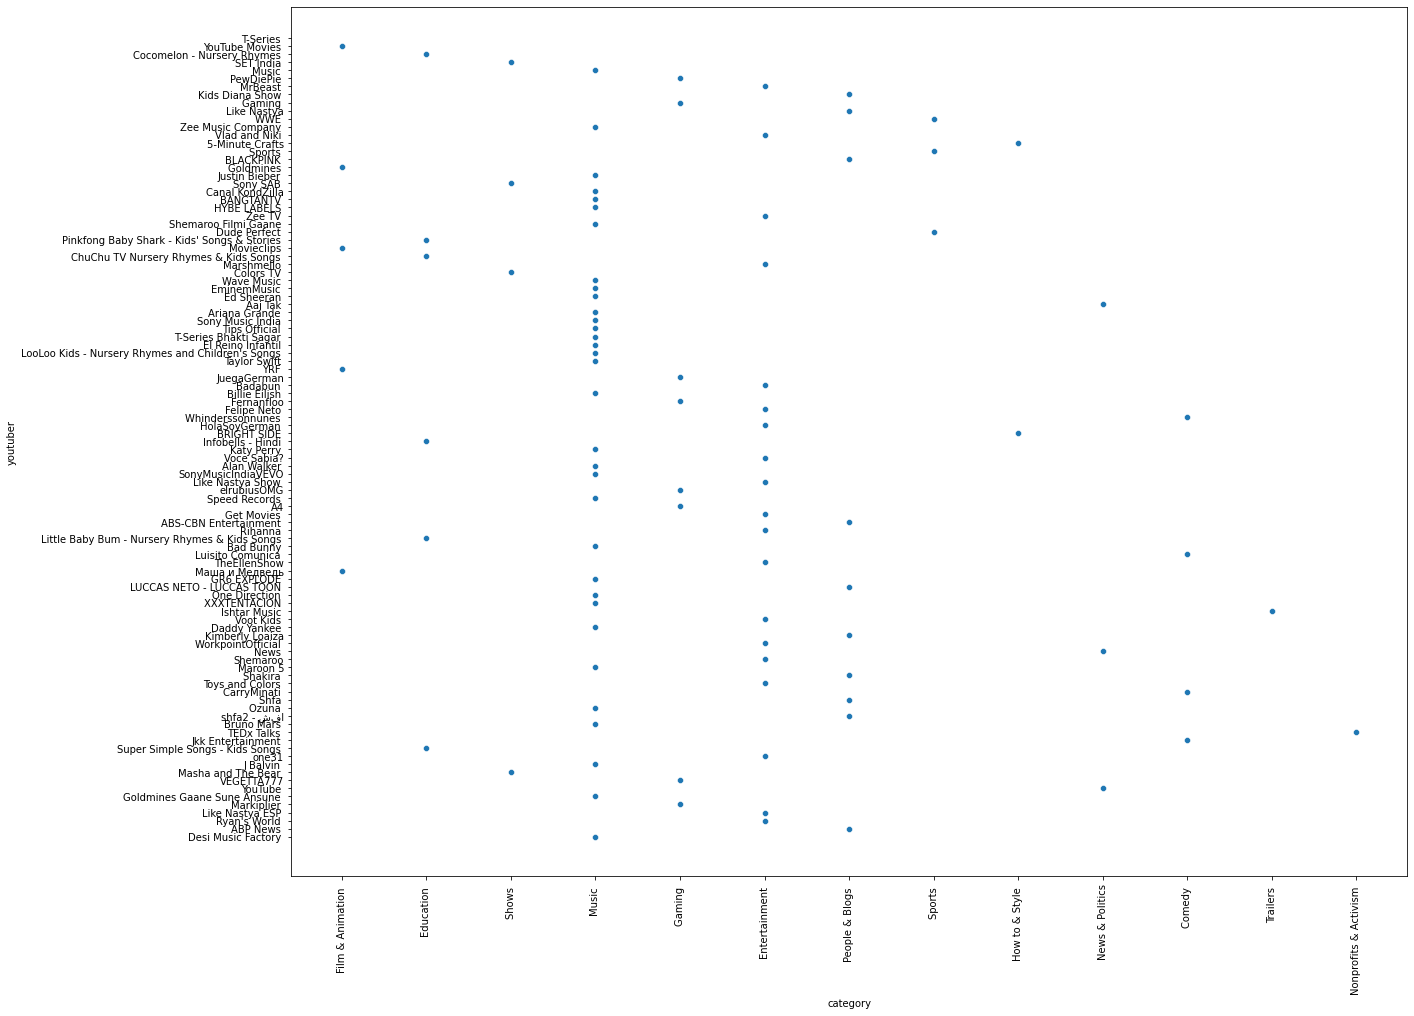

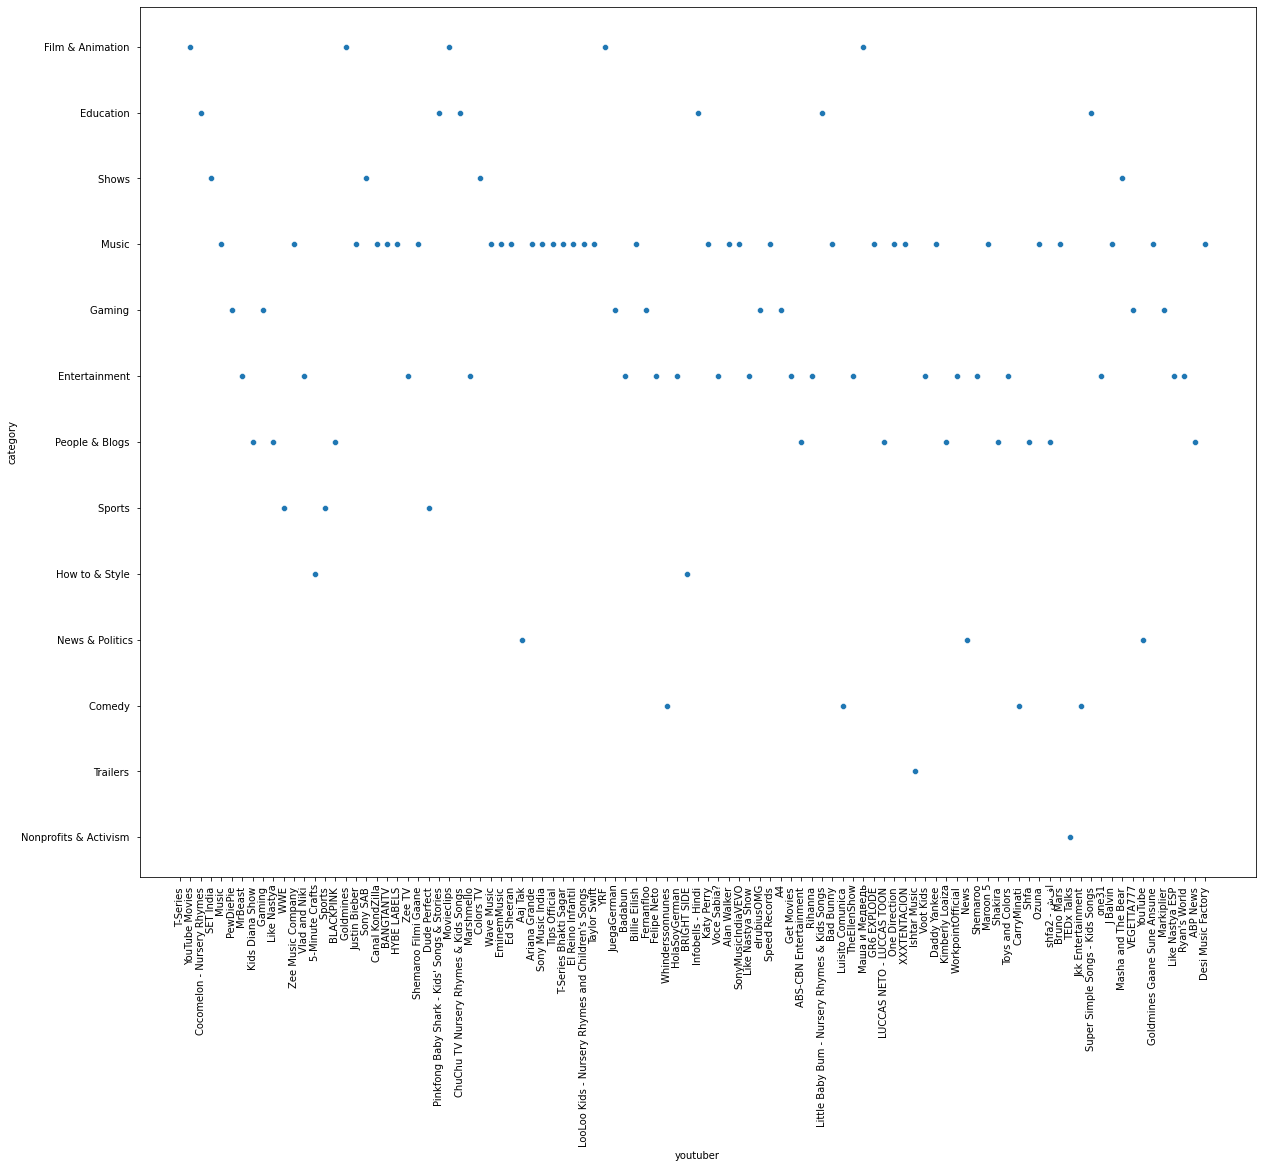

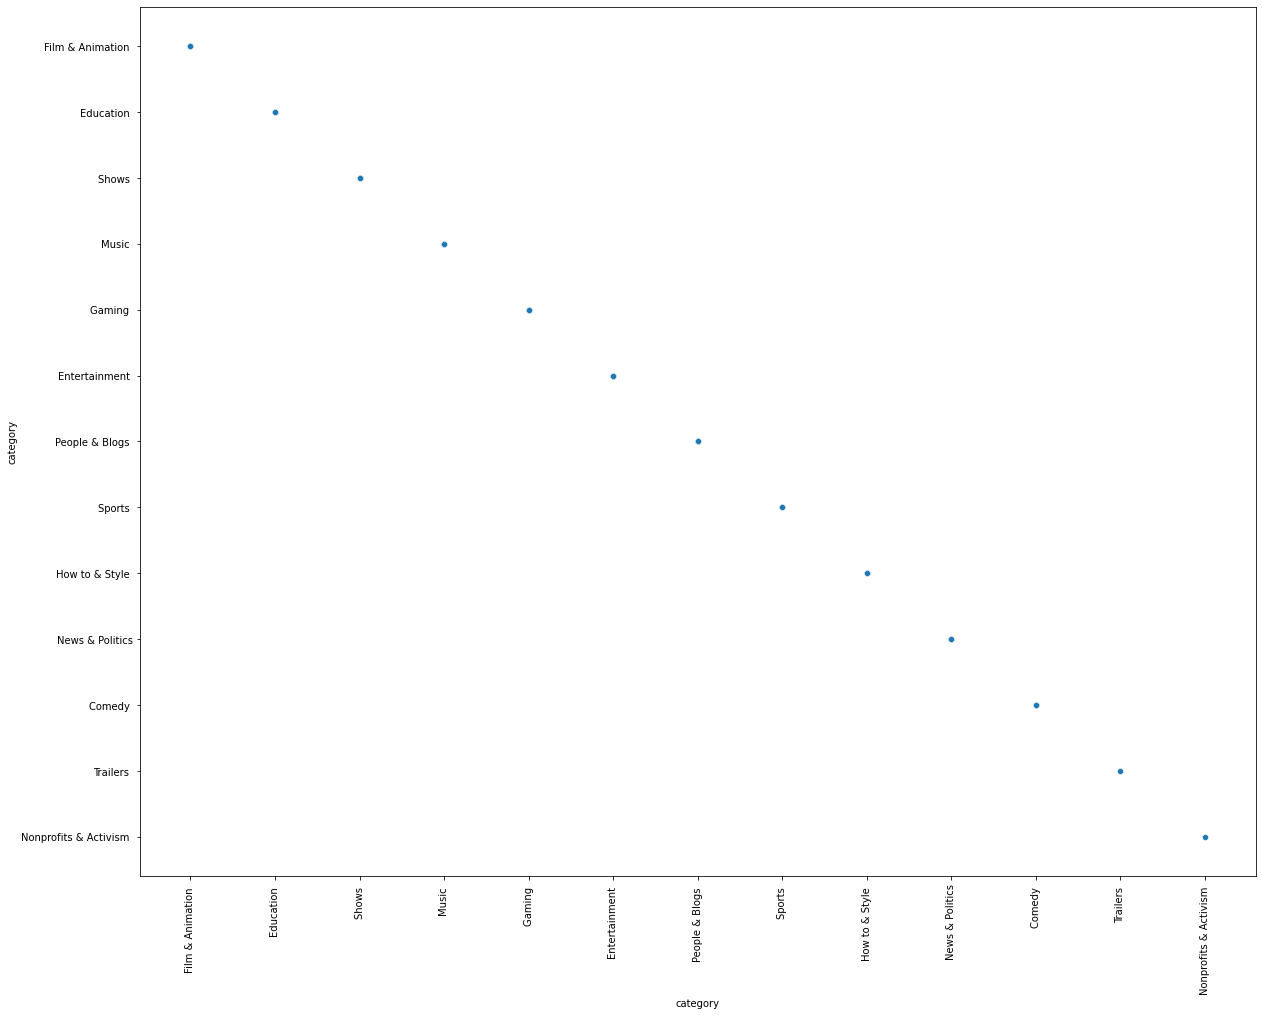

In [83]:
def unibi(a):
  for col in cat:
    for col1 in cat:
       plt.figure(figsize=(20,16))
       sns.scatterplot(x=data[col1] ,y=data[col])
       plt.xticks(rotation=90);

unibi(data)

**BI-VARIATE FOR CATEGORICAL TO NUMERICAL**

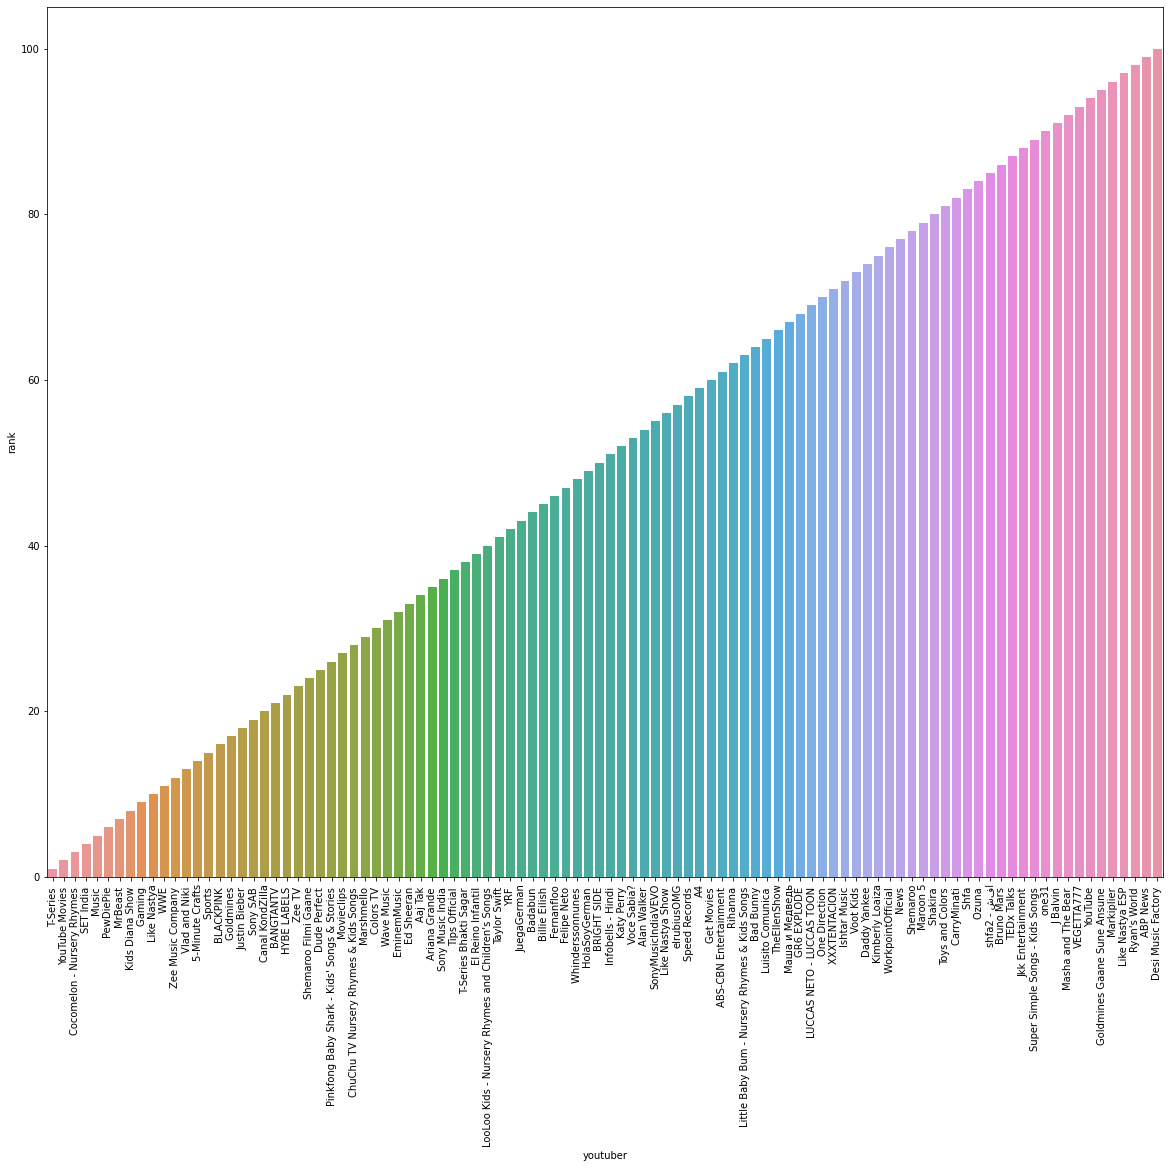

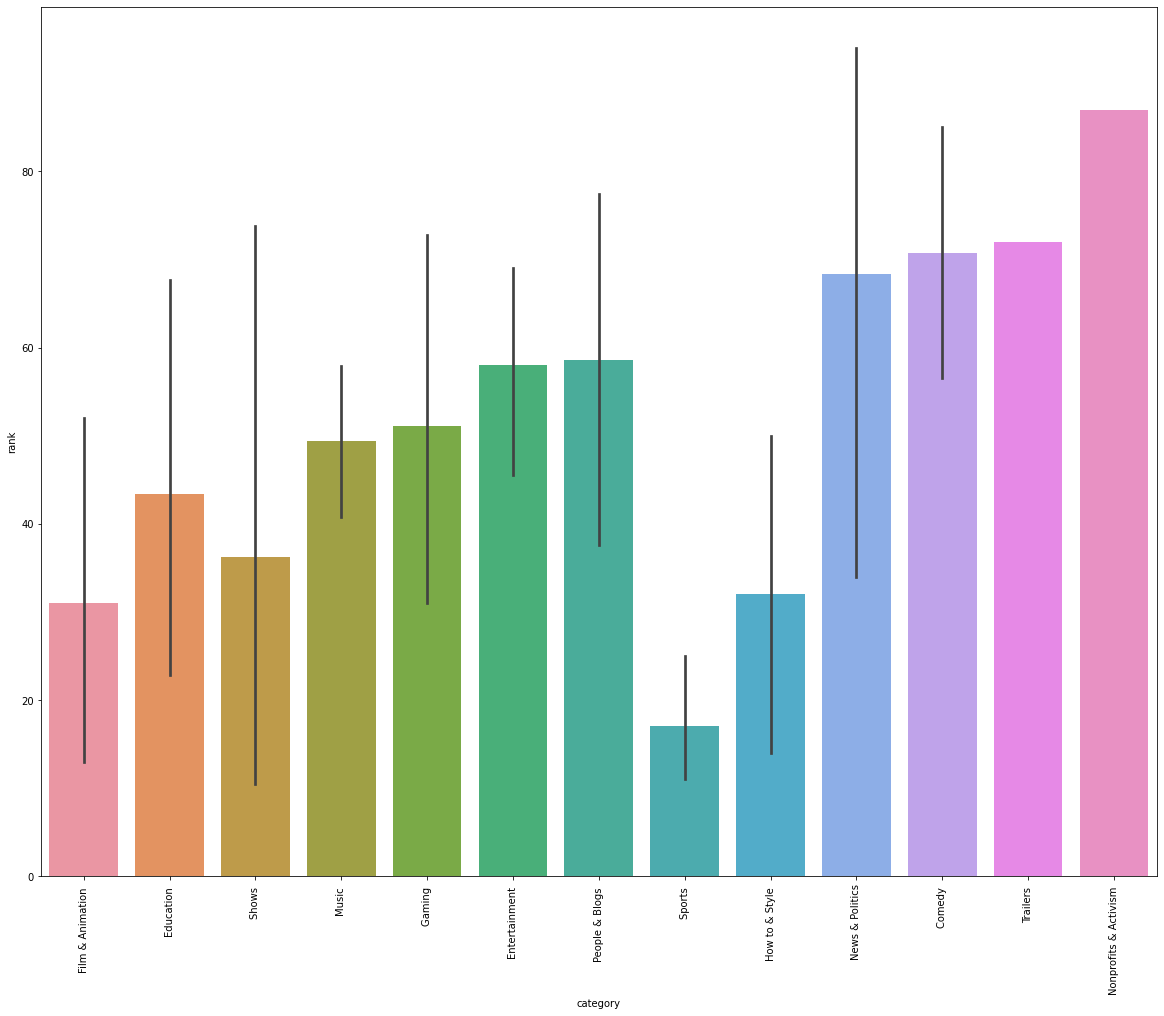

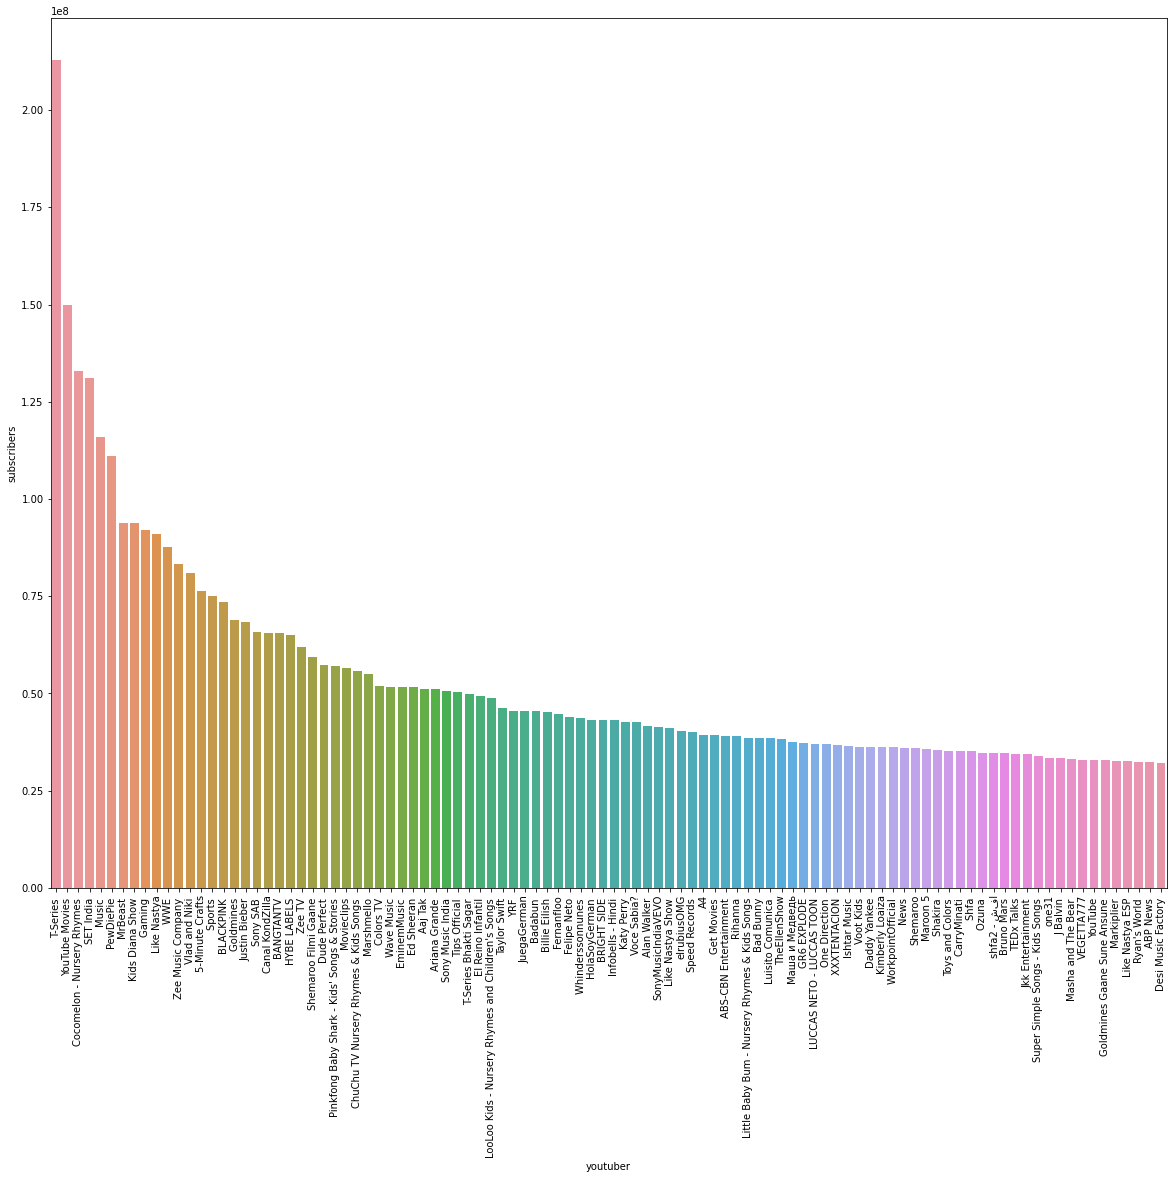

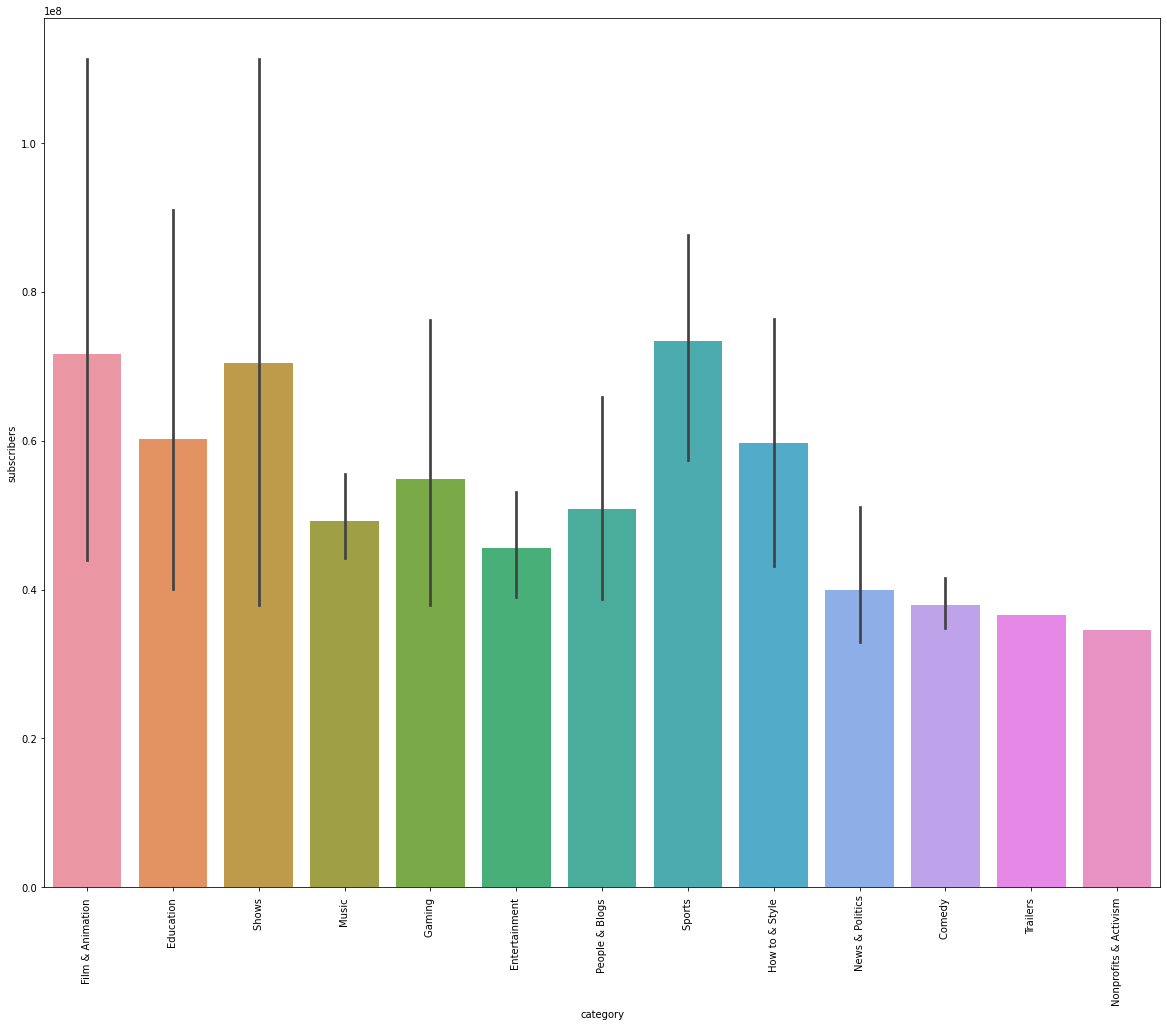

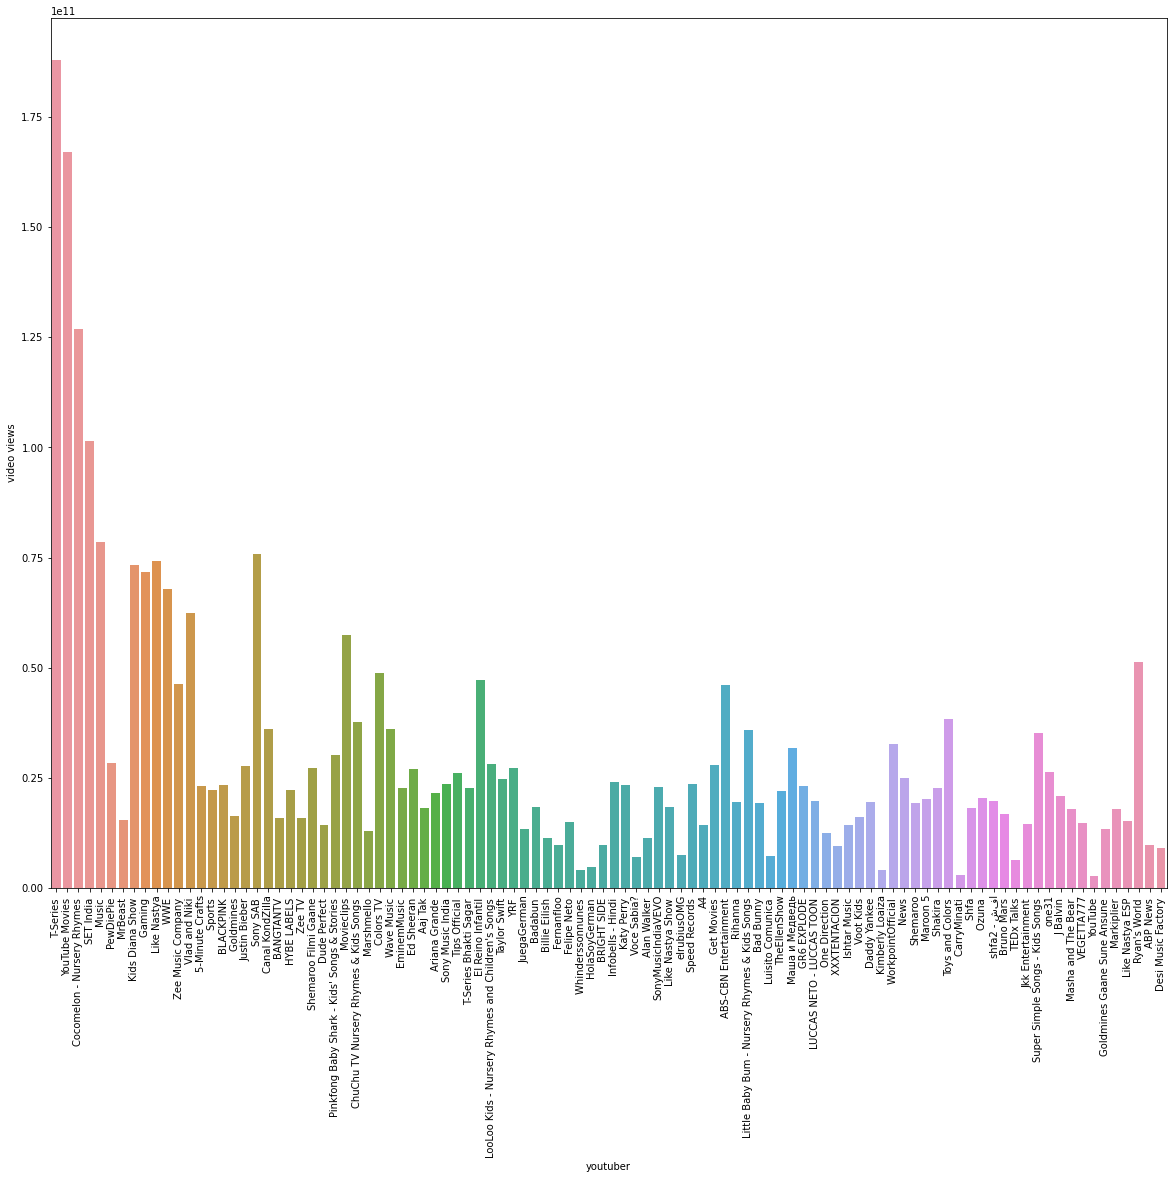

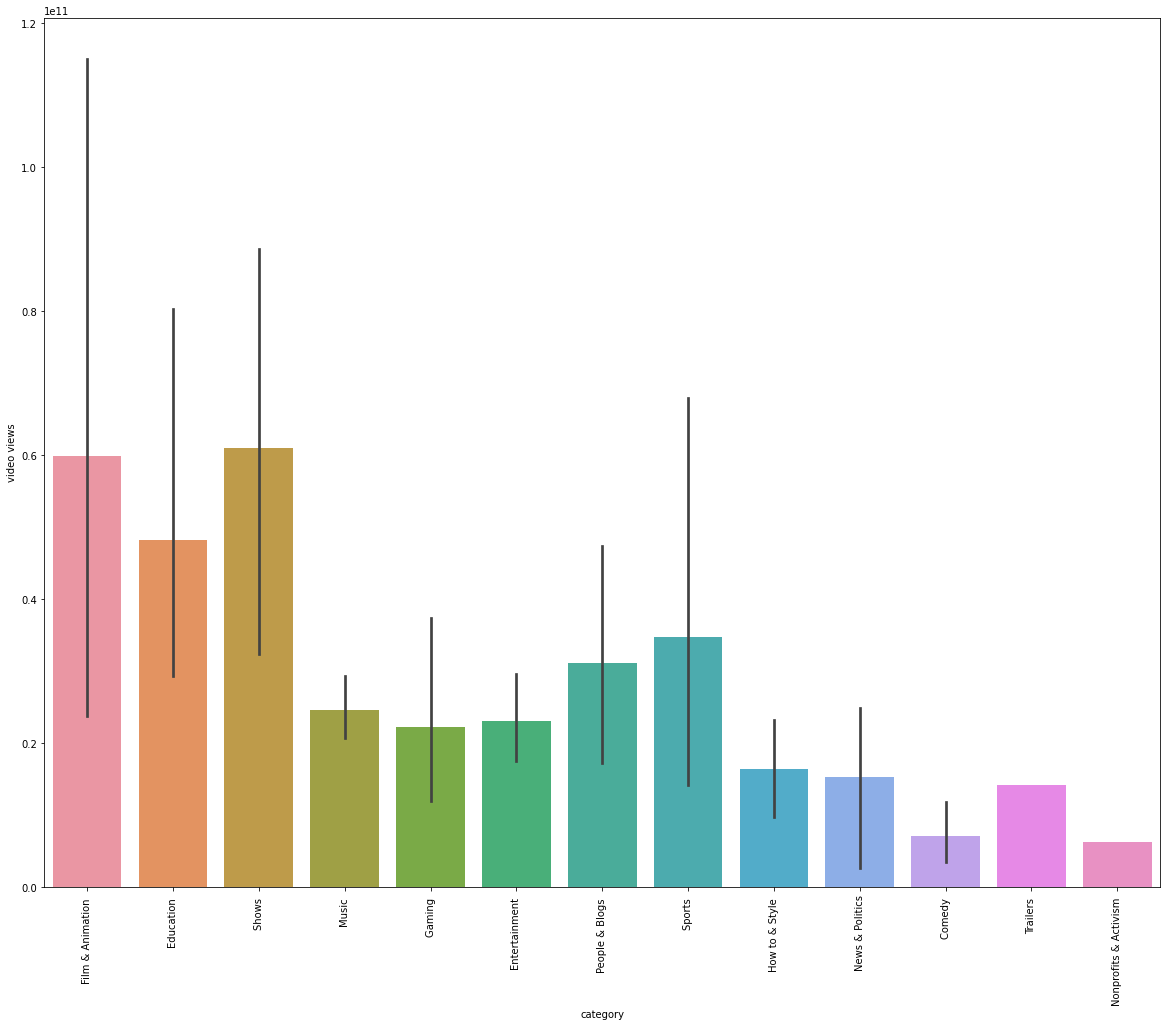

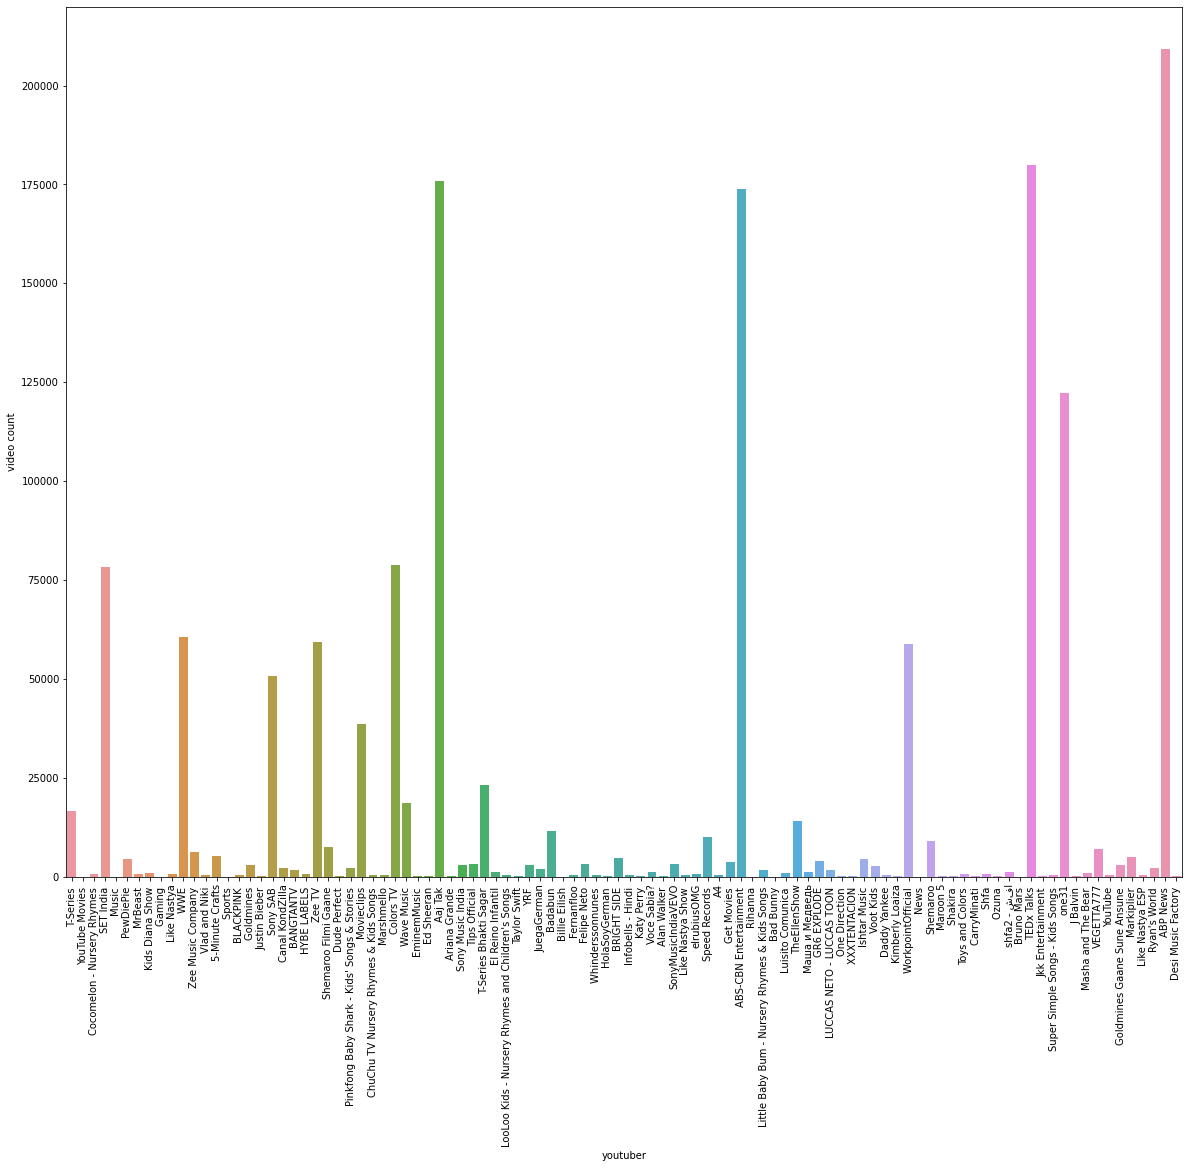

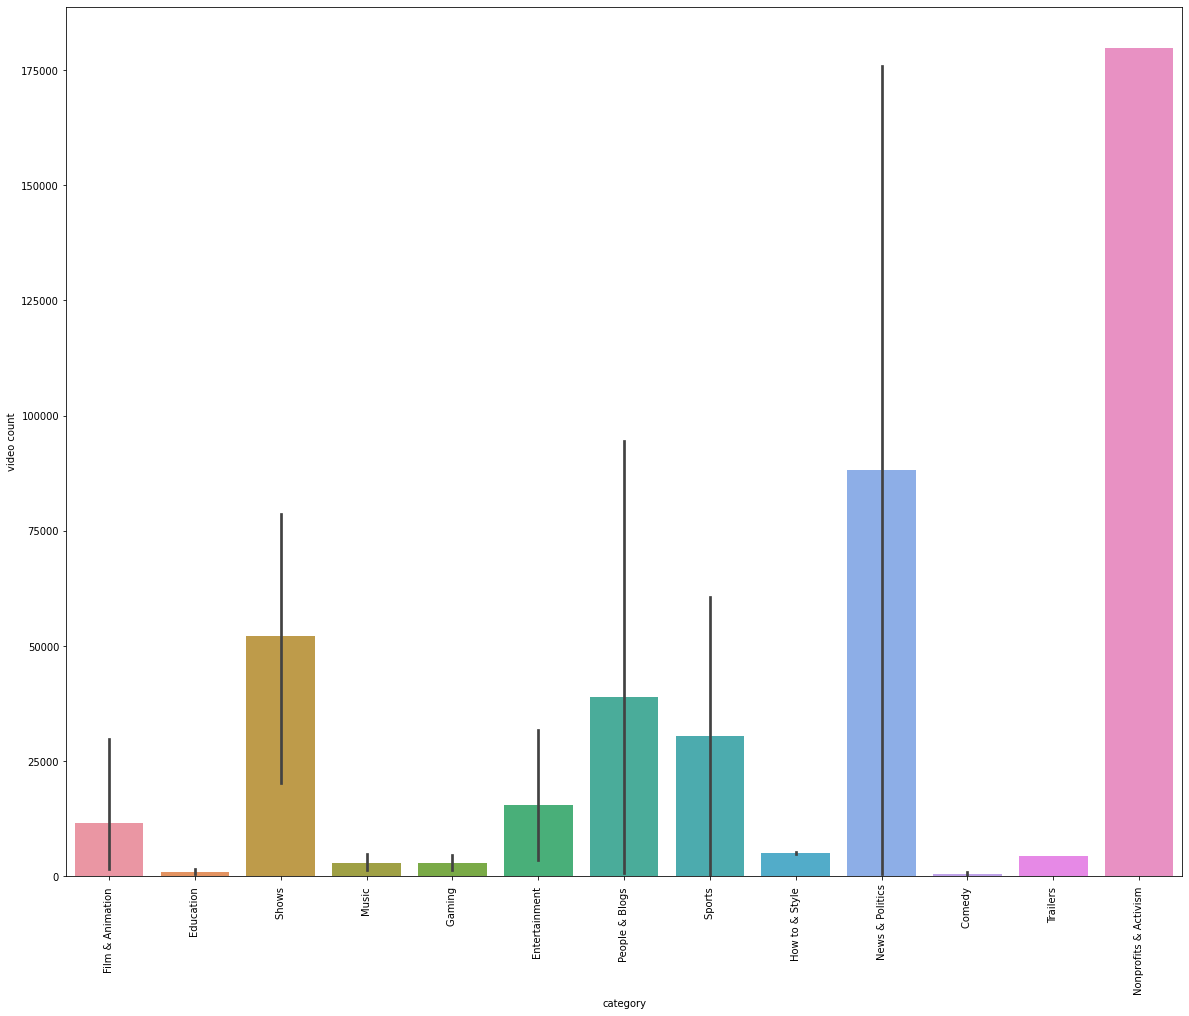

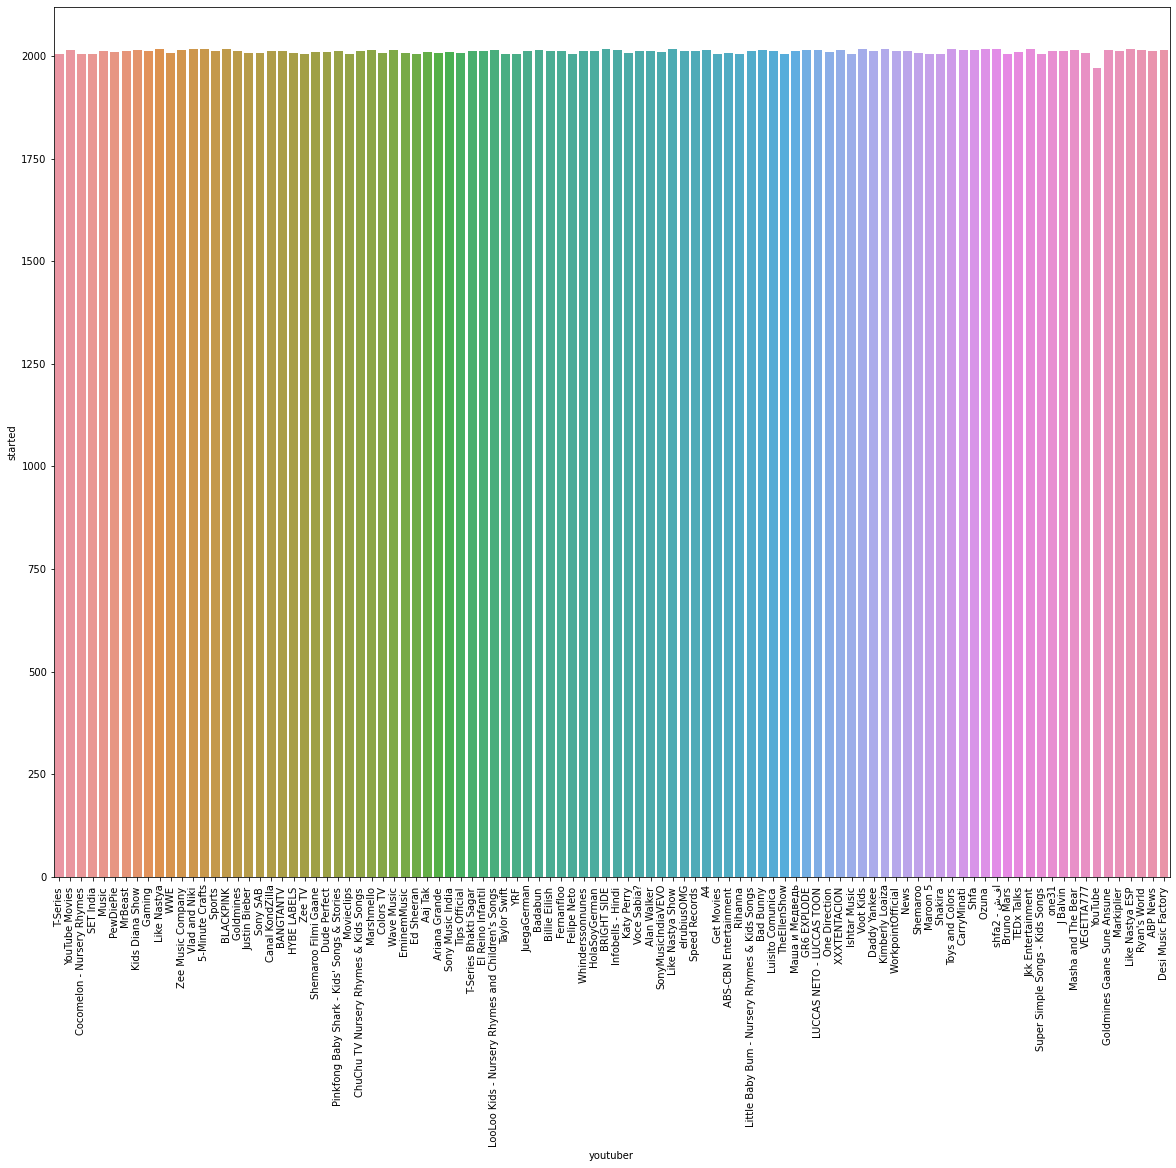

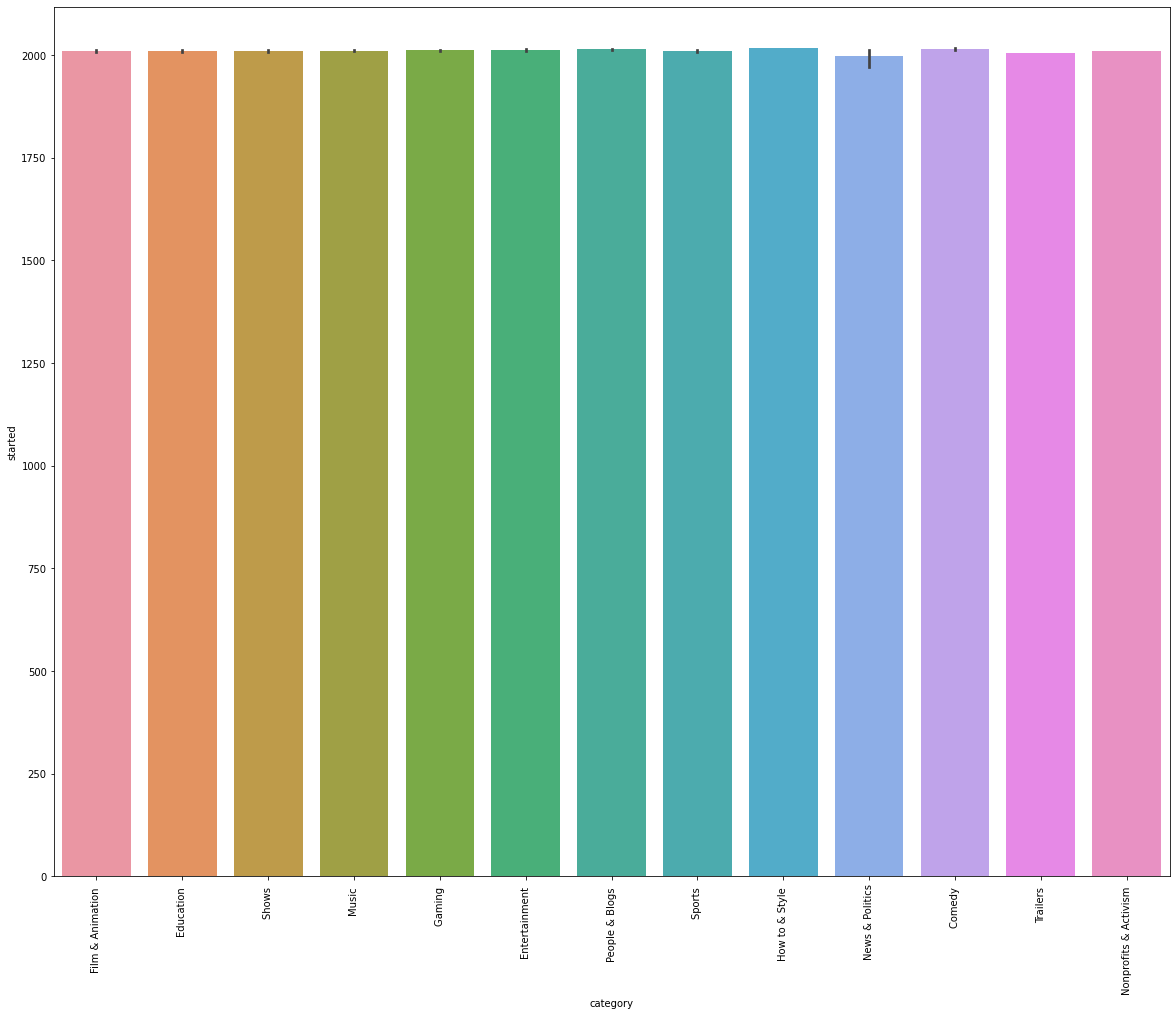

In [84]:
def unibi(a): 
  for col in num:
    for col1 in cat:
       plt.figure(figsize=(20,16))
       sns.barplot(x=data[col1] ,y=data[col])
       plt.xticks(rotation=90);

unibi(data)

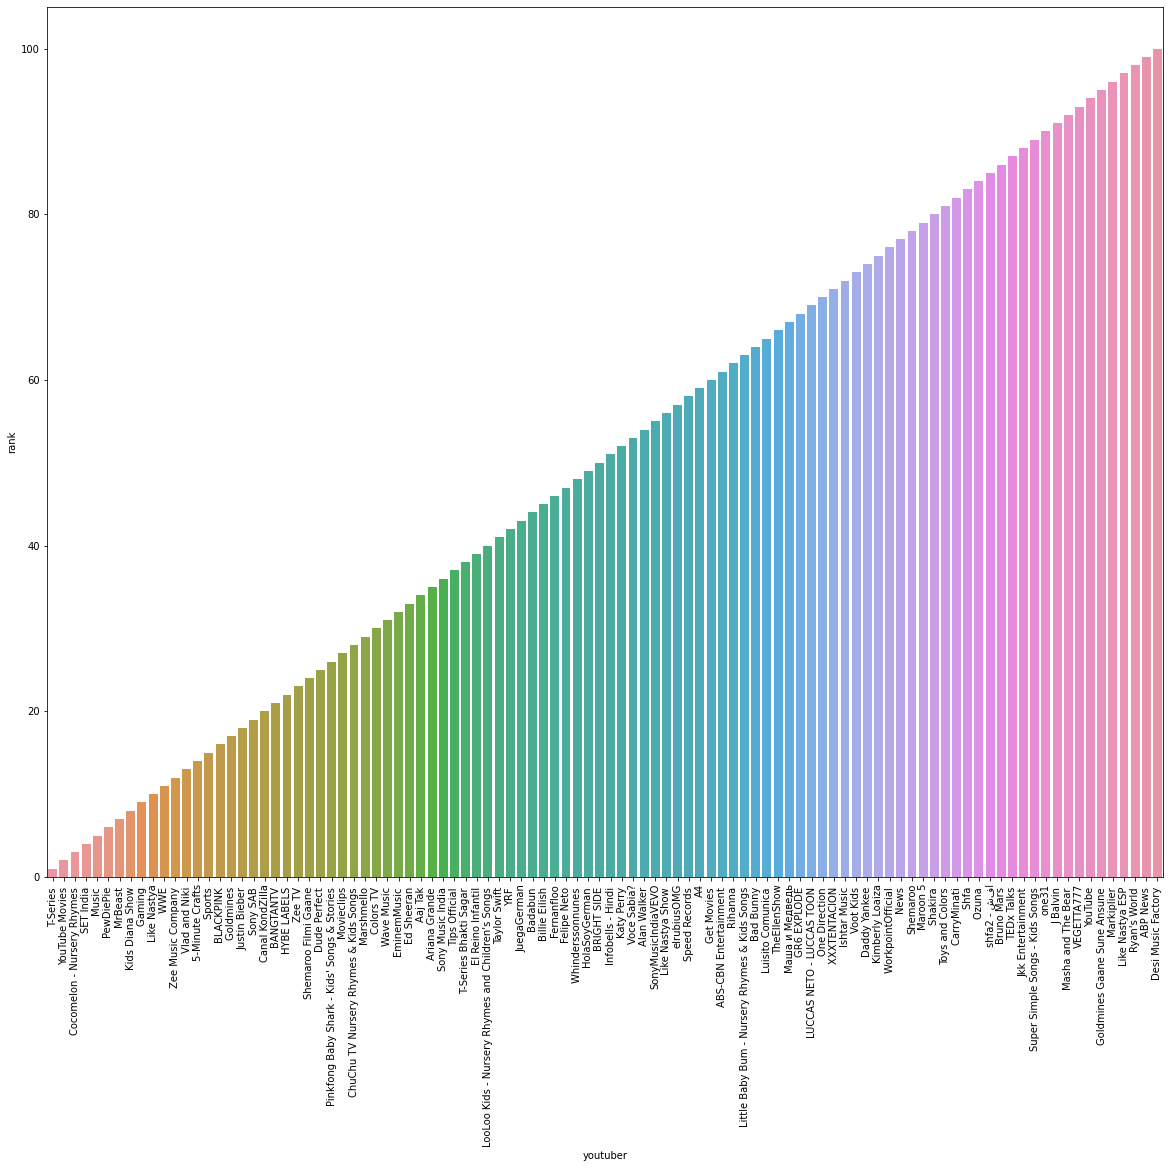

In [85]:
plt.figure(figsize=(20,16))
sns.barplot(y=data['rank'],x=data['youtuber'])
plt.xticks(rotation=90);


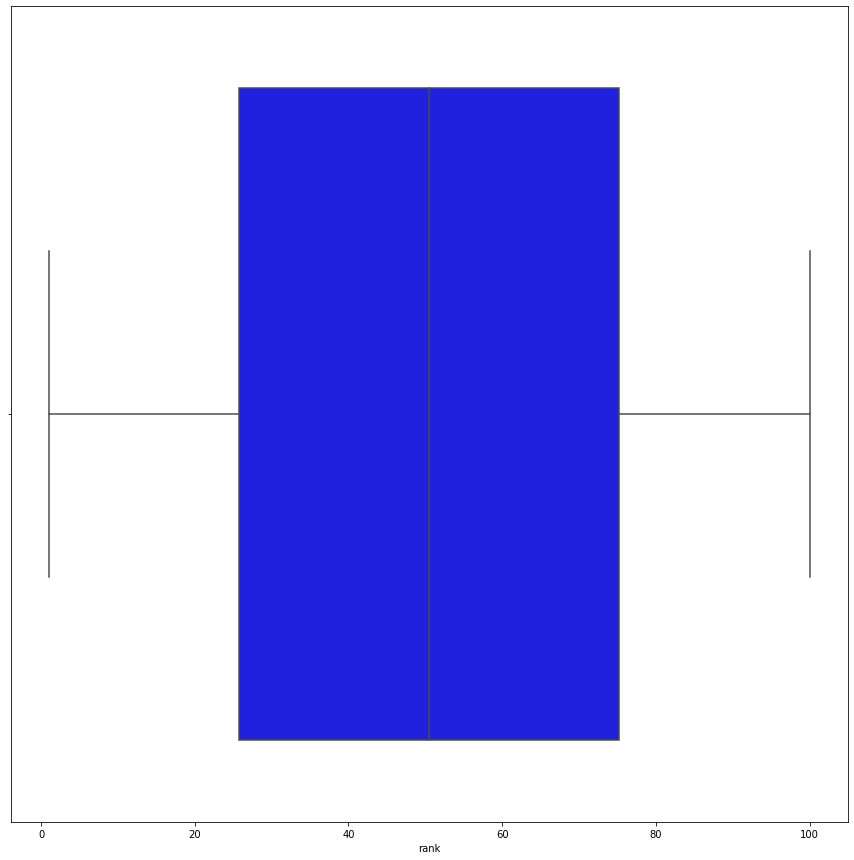

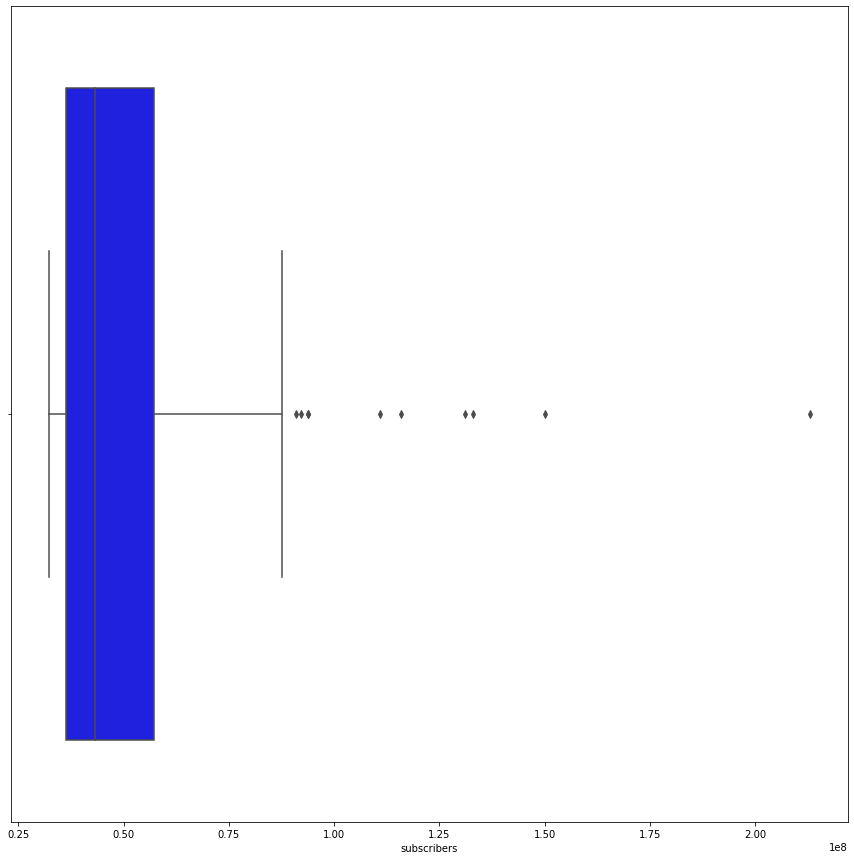

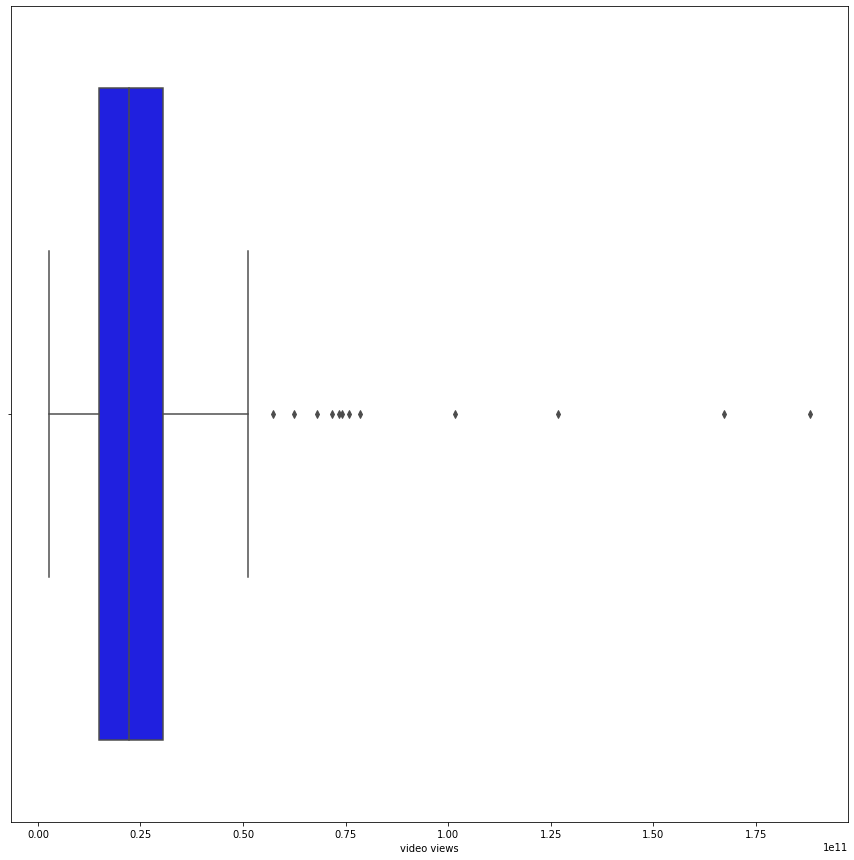

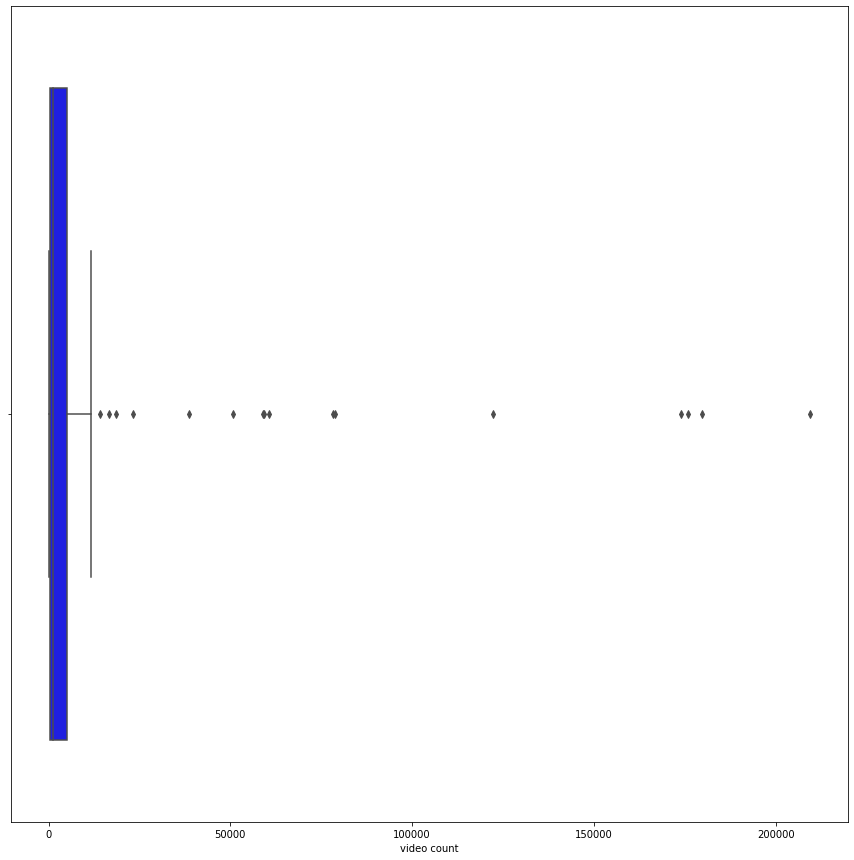

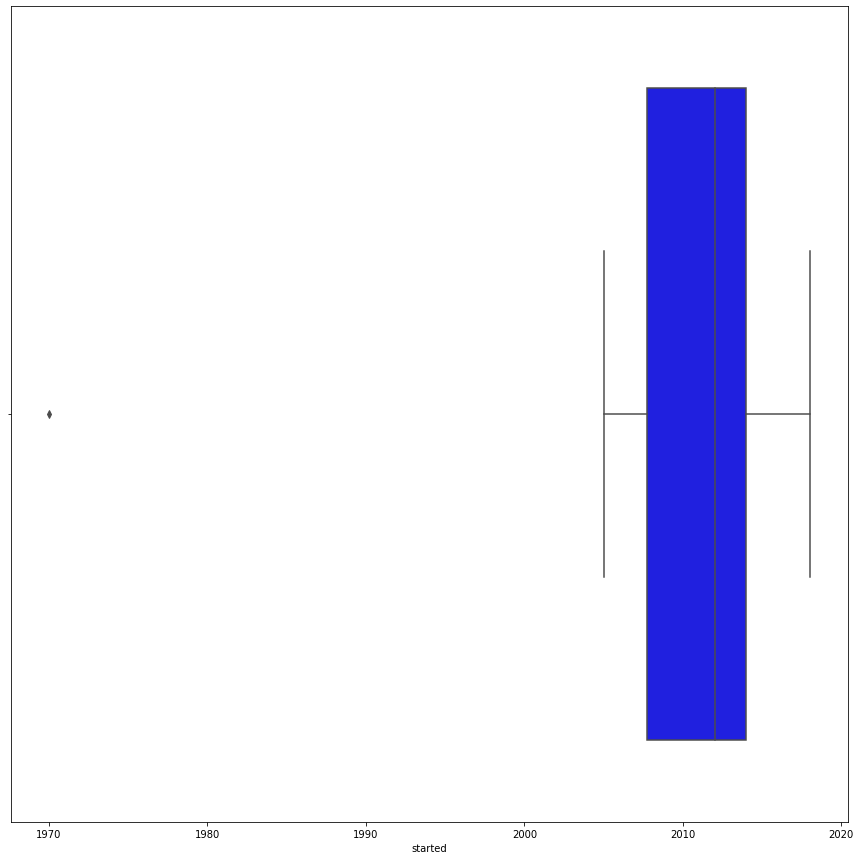

In [86]:
#univariate in boxplot
def funct(a):
        for col in num:
            plt.figure(figsize=(15,15))
            sns.boxplot(x=data[col],color="blue")
funct(data)

In [87]:
data.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [88]:
data['video count'].mean()

15847.22105263158

In [89]:
data['video count'].median()

1139.0

**NA IMPUTATION**

In [90]:
for i in num:
    if (data[i].skew()<-1 or data[i].skew()>1):
      data[i]=data[i].replace(np.NaN,data[i].median())
    else:
      data[i]=data[i].replace(np.NaN,data[i].mean())
    print(data[i])  
data[cat]=data[cat].fillna(data.mode().iloc[0])
print(data[cat])

0       1
1       2
2       3
3       4
4       5
     ... 
95     96
96     97
97     98
98     99
99    100
Name: rank, Length: 100, dtype: int64
0     213000000
1     150000000
2     133000000
3     131000000
4     116000000
        ...    
95     32600000
96     32600000
97     32400000
98     32300000
99     32200000
Name: subscribers, Length: 100, dtype: int64
0     1.880740e+11
1     1.671230e+11
2     1.268230e+11
3     1.015420e+11
4     7.843787e+10
          ...     
95    1.801184e+10
96    1.514486e+10
97    5.131260e+10
98    9.850741e+09
99    9.115578e+09
Name: video views, Length: 100, dtype: float64
0      16708.0
1       1139.0
2        751.0
3      78334.0
4       1139.0
        ...   
95      5129.0
96       584.0
97      2155.0
98    209351.0
99       122.0
Name: video count, Length: 100, dtype: float64
0     2006
1     2015
2     2006
3     2006
4     2013
      ... 
95    2012
96    2017
97    2015
98    2012
99    2014
Name: started, Length: 100, dtype: int64
 

In [91]:
data.isnull().sum()

rank           0
youtuber       0
subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64

**FIND OUTLIER**

In [92]:
def outlier(data, a):
  q1=np.quantile(data[a],0.25)
  q3=np.quantile(data[a],0.75)
  iqr=q3-q1
  upperbound=q3+(1.5*iqr)
  lowerbound=q1-(1.5*iqr)
  return data[(data[a]<lowerbound)|(data[a]>upperbound)]

outlier(data,'video count')


,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,213000000,1.880740e+11,16708.0,Music,2006
3,4,SET India,131000000,1.015420e+11,78334.0,Shows,2006
10,11,WWE,87600000,6.796048e+10,60699.0,Sports,2007
18,19,Sony SAB,65900000,7.588549e+10,50810.0,Shows,2007
22,23,Zee TV,62000000,1.590008e+10,59332.0,Entertainment,2005
26,27,Movieclips,56600000,5.731791e+10,38746.0,Film & Animation,2006
29,30,Colors TV,51900000,4.886899e+10,78851.0,Shows,2008
30,31,Wave Music,51700000,3.601272e+10,18630.0,Music,2014
33,34,Aaj Tak,51100000,1.820733e+10,175877.0,News & Politics,2009
37,38,T-Series Bhakti Sagar,49900000,2.279715e+10,23183.0,Music,2011


**REPLACE OUTLIER**

In [93]:
def outreplace(data):
    for i in num:
        q1 = np.quantile(data[i],0.25)
        q3 = np.quantile(data[i],0.75)
        iqr=q3-q1
        upper_bound=q3+(1.5*iqr)
        lower_bound=q1-(1.5*iqr)
        median=np.median(data[i])
        lower=np.quantile(data[i],0.10)
        upper=np.quantile(data[i],0.90)
        for j in data[i]:
            if j <= lower_bound:
                data[i].replace(to_replace=j,value=lower,inplace=True)
            elif j >= upper_bound:
                data[i].replace(to_replace=j,value=upper,inplace=True)
            else:
                data[i].replace(to_replace=j,value=j,inplace=True)
      
outreplace(data)

**BOXPLOT AFTER REMOVING OUTLIER**

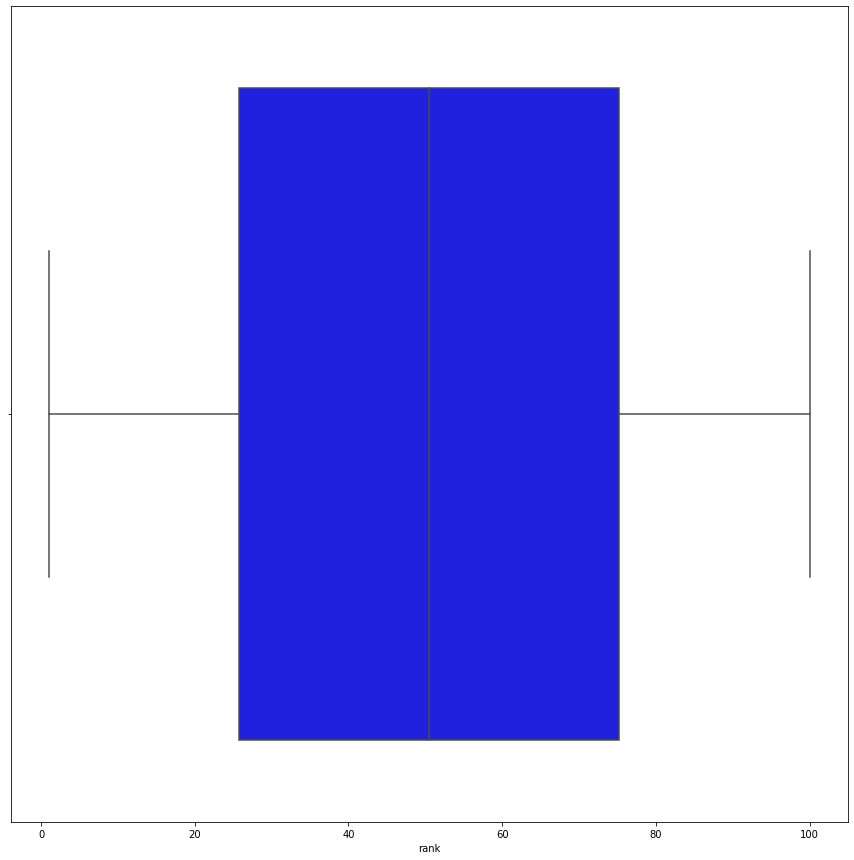

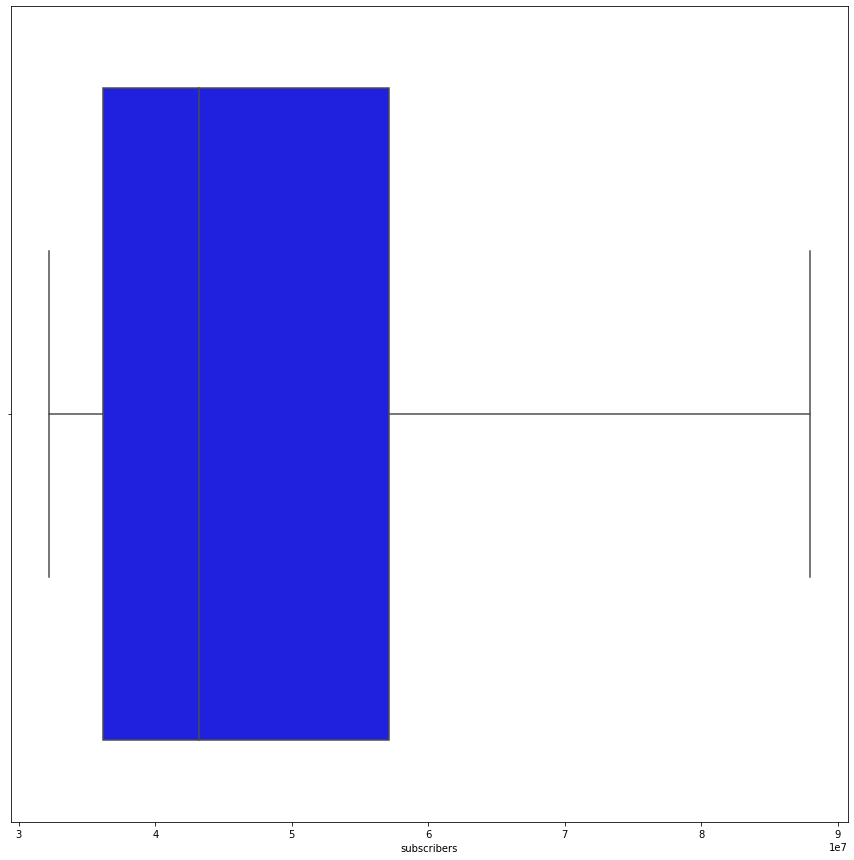

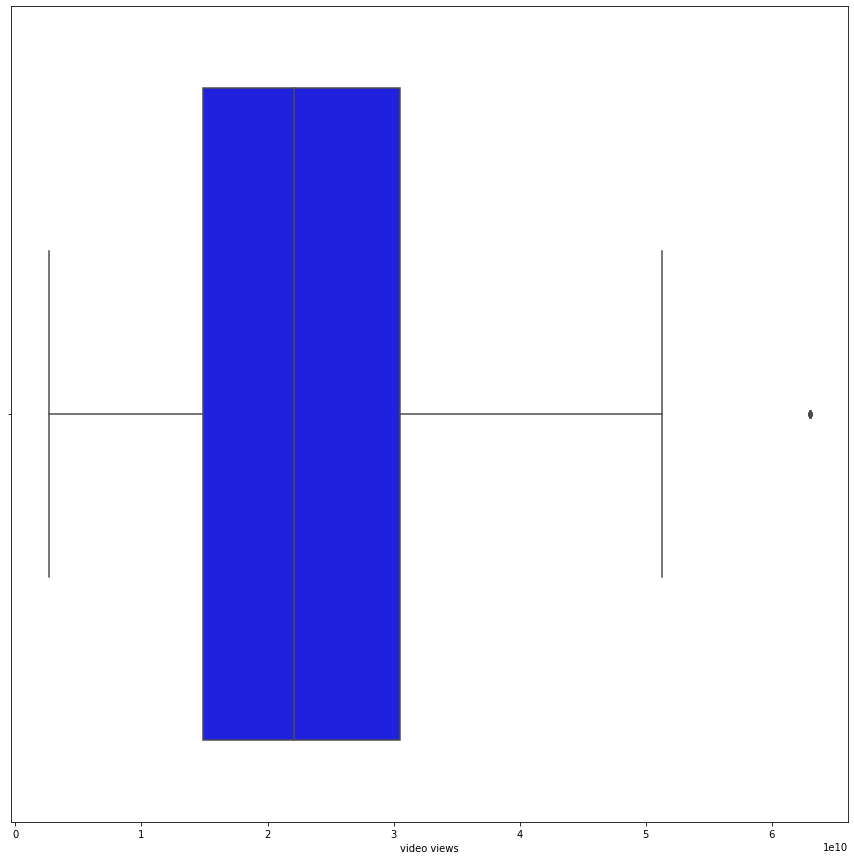

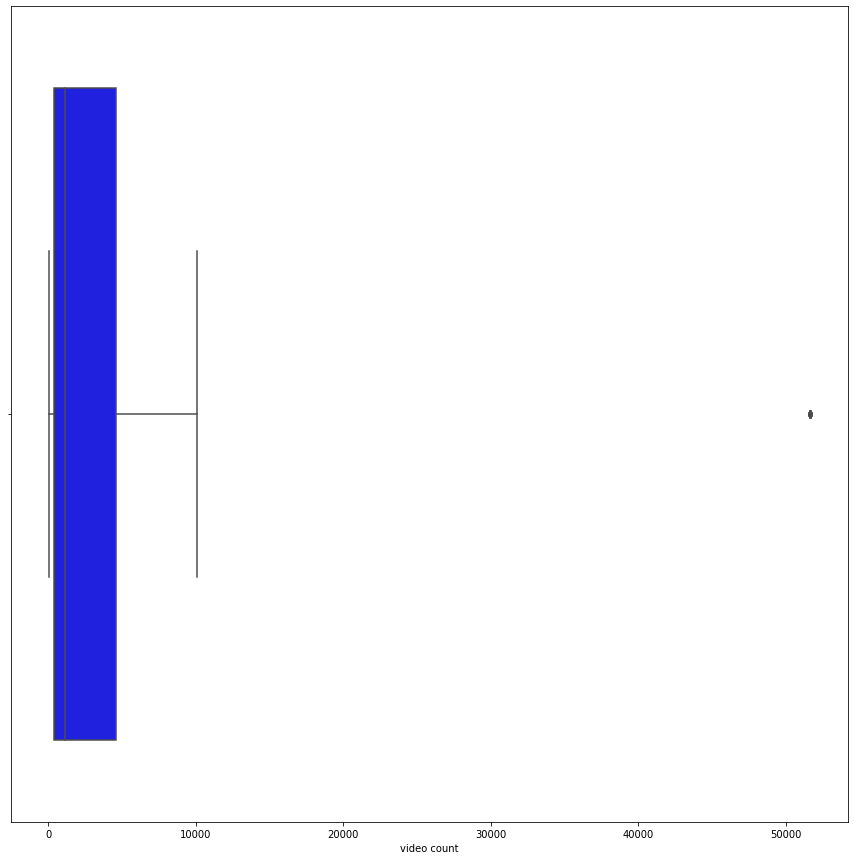

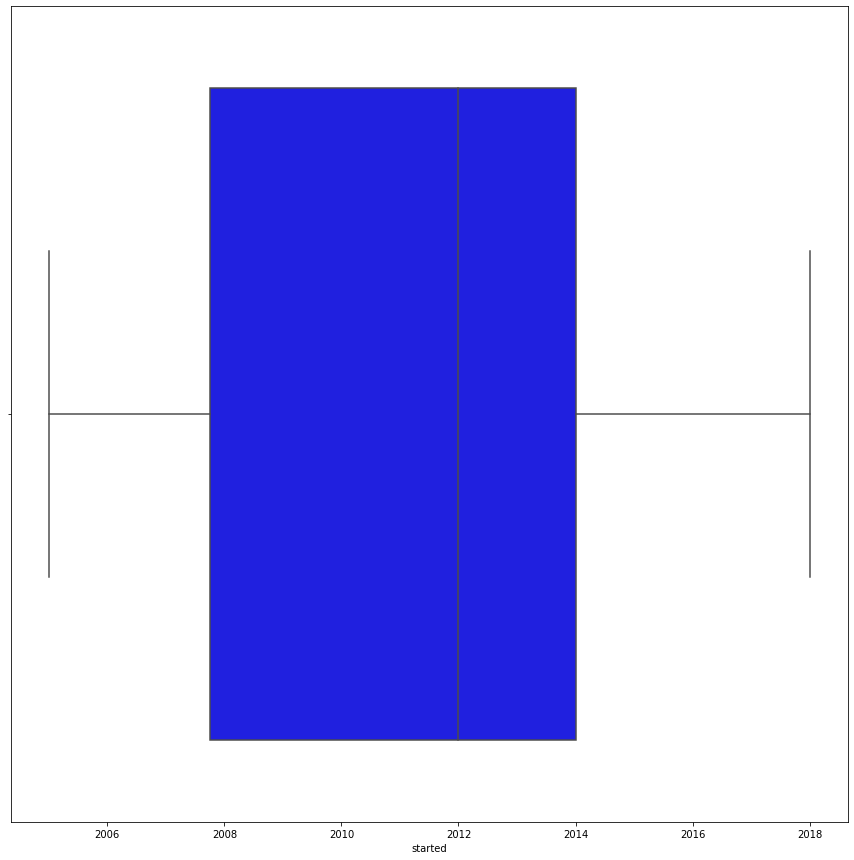

In [94]:
#univariate in boxplot
def funct(a):
        for col in num:
            plt.figure(figsize=(15,15))
            sns.boxplot(x=data[col],color="blue")
funct(data)

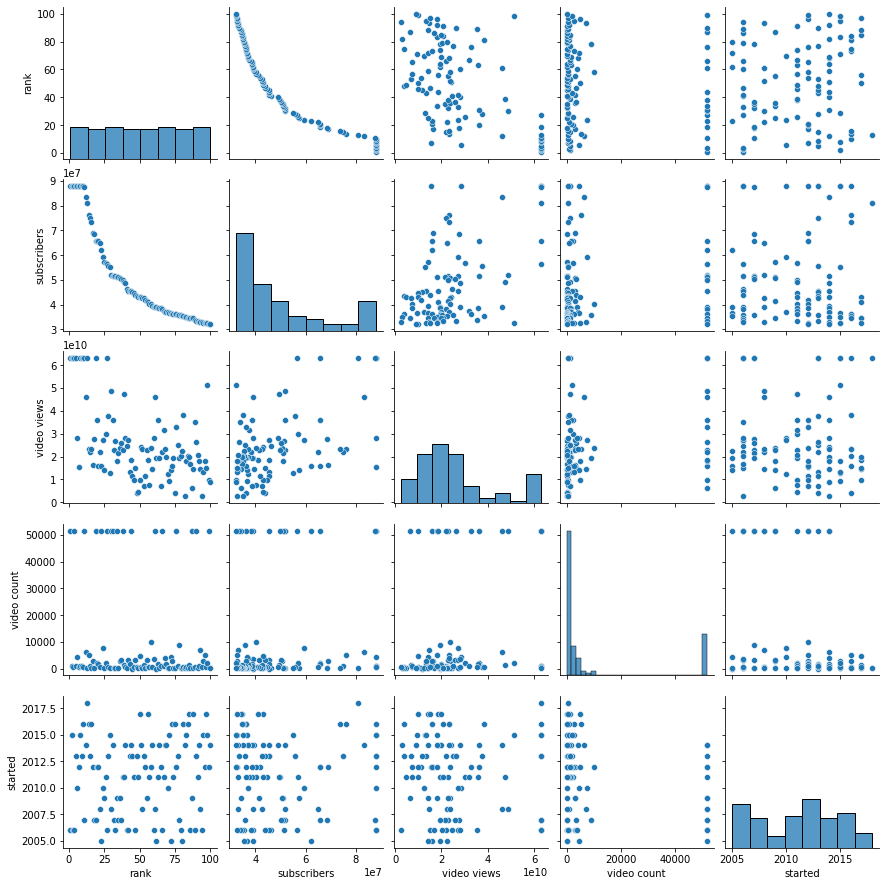

In [95]:
sns.pairplot(data);

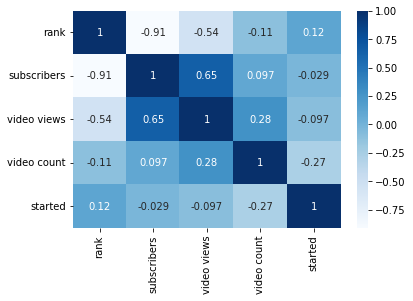

In [96]:
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues');

In [97]:
data.columns

Index(['rank', 'youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

**Chi - Square Test**

In [98]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(data['youtuber'],data['video views'],margins=True)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.7725756114606203


In [99]:
### Another method of chi2

from scipy.stats import chi2_contingency

con=pd.crosstab(data['youtuber'],data['video views'],margins=True)

chi2,p,dof,expected=chi2_contingency(con)
print('chi-square Statistics %0.3f p_value %0.3f' % (chi2,p))


chi-square Statistics 8800.000 p_value 0.773


In [100]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['youtuber'],columns=data['category'])
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.3978080355179003


In [101]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=data['video views'],columns=data['category'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

category      Comedy   Education   Entertainment   Film & Animation   Gaming   \
video views                                                                     
2.647950e+09        0           0               0                  0        0   
2.844278e+09        1           0               0                  0        0   
3.997276e+09        0           0               0                  0        0   
4.056750e+09        1           0               0                  0        0   
4.702062e+09        0           0               1                  0        0   
...               ...         ...             ...                ...      ...   
4.629123e+10        0           0               0                  0        0   
4.723283e+10        0           0               0                  0        0   
4.886899e+10        0           0               0                  0        0   
5.131260e+10        0           0               1                  0        0   
6.299611e+10        0       

**Spearman Algorithms**

In [102]:
spearmanr_coff,p_value = spearmanr(data['category'],data['video count'])
print('spearman coff is %0.3f ,p_value is %0.3f' % (spearmanr_coff,p_value))

spearman coff is 0.062 ,p_value is 0.540


In [103]:
spearmanr_coff,p_value = spearmanr(data['youtuber'],data['video count'])
print('spearman coff is %0.3f ,p_value is %0.3f' % (spearmanr_coff,p_value))

spearman coff is 0.245 ,p_value is 0.014


In [104]:
data.head(10)

,rank,youtuber,subscribers,video views,video count,category,started
0,1,T-Series,87940000.0,6.299611e+10,51620.6,Music,2006
1,2,YouTube Movies,87940000.0,6.299611e+10,1139.0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,87940000.0,6.299611e+10,751.0,Education,2006
3,4,SET India,87940000.0,6.299611e+10,51620.6,Shows,2006
4,5,Music,87940000.0,6.299611e+10,1139.0,Music,2013
5,6,PewDiePie,87940000.0,2.826078e+10,4472.0,Gaming,2010
6,7,MrBeast,87940000.0,1.541730e+10,721.0,Entertainment,2012
7,8,Kids Diana Show,87940000.0,6.299611e+10,977.0,People & Blogs,2015
8,9,Gaming,87940000.0,6.299611e+10,1139.0,Gaming,2013
9,10,Like Nastya,87940000.0,6.299611e+10,670.0,People & Blogs,2016


**Feature Scaling (Normalization)**

In [105]:
scaling = MinMaxScaler()
dataX=data.drop(['video count','youtuber','category'],axis=1)
y=data['video count']
np.random.rand(42)
X=scaling.fit_transform(dataX)
X

array([[0.        , 1.        , 1.        , 0.07692308],
       [0.01010101, 1.        , 1.        , 0.76923077],
       [0.02020202, 1.        , 1.        , 0.07692308],
       [0.03030303, 1.        , 1.        , 0.07692308],
       [0.04040404, 1.        , 1.        , 0.61538462],
       [0.05050505, 1.        , 0.42441773, 0.38461538],
       [0.06060606, 1.        , 0.21159476, 0.53846154],
       [0.07070707, 1.        , 1.        , 0.76923077],
       [0.08080808, 1.        , 1.        , 0.61538462],
       [0.09090909, 1.        , 1.        , 0.84615385],
       [0.1010101 , 0.99390025, 1.        , 0.15384615],
       [0.11111111, 0.91675637, 0.72319155, 0.69230769],
       [0.12121212, 0.87369932, 1.        , 1.        ],
       [0.13131313, 0.7911733 , 0.34013778, 0.84615385],
       [0.14141414, 0.76964478, 0.32326899, 0.61538462],
       [0.15151515, 0.74273412, 0.34307665, 0.84615385],
       [0.16161616, 0.65662002, 0.22574833, 0.53846154],
       [0.17171717, 0.64944385,

In [106]:
# split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Model build Linear Regression**

In [107]:
#model 
reg_lin1 = LinearRegression()
reg_lin1.fit(X_train,y_train)
lin_pred1 = reg_lin1.predict(X_test)
mapps=mean_absolute_percentage_error(lin_pred1, y_test)
accuracy=100-mapps
print('error:',"%.2f" % mapps , '%')
print('Accuracy:',"%.2f" % accuracy, '%') 
print('root mean squared error:',"%.2f" % np.sqrt(mapps),'%')

error: 1.87 %
Accuracy: 98.13 %
root mean squared error: 1.37 %


In [108]:
mapps+accuracy

100.0

**Lasso regression**

In [109]:
#model 
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)
laso_pred1 = lasso_model.predict(X_test)
men=mean_absolute_error(laso_pred1,y_test)
mapps=mean_absolute_percentage_error(laso_pred1, y_test)
accuracy=100-mapps
print('error:',"%.2f" % mapps, '%')
print('Accuracy:',"%.2f" % accuracy, '%')
print('root mean squared error:',"%.2f" % np.sqrt(mapps),'%')

error: 1.87 %
Accuracy: 98.13 %
root mean squared error: 1.37 %


**Ridge Regression**

In [110]:
#model 
ridge_model = Ridge(alpha=1.0, normalize=True)
ridge_model.fit(X_train,y_train)
ridge_pred1 = ridge_model.predict(X_test)
men=mean_absolute_error(ridge_pred1,y_test)
mapps=mean_absolute_percentage_error(ridge_pred1, y_test)
accuracy=100-mapps
print('error:',"%.2f" % mapps,'%')
print('Accuracy:',"%.2f" % accuracy,'%')
print('root mean squared error:',"%.2f" % np.sqrt(mapps),'%')

error: 1.86 %
Accuracy: 98.14 %
root mean squared error: 1.36 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


**Decision Tree**

In [111]:
#model 
dec_model = DecisionTreeRegressor(random_state = 0)
dec_model.fit(X_train,y_train)
dec_pred1 = dec_model.predict(X_test)
men=mean_absolute_error(dec_pred1,y_test)
mapps=mean_absolute_percentage_error(dec_pred1, y_test)
accuracy=100-mapps
print('error:',"%.2f" % mapps,'%')
print('Accuracy:',"%.2f" % accuracy,'%')
print('root mean squared error:',"%.2f" % np.sqrt(mapps),'%')

error: 13.26 %
Accuracy: 86.74 %
root mean squared error: 3.64 %


**Random Forest**

In [112]:
#model 
reg_model = RandomForestRegressor(n_estimators=100,random_state=42)
reg_model.fit(X_train,y_train)
reg_pred1 = reg_model.predict(X_test)
men=mean_absolute_error(reg_pred1,y_test)
mapps=mean_absolute_percentage_error(reg_pred1, y_test)
accuracy=100-mapps
print('error:',"%.2f" % mapps,'%')
print('Accuracy:',"%.2f" % accuracy,'%')
print('root mean squared error:',"%.2f" % np.sqrt(mapps),'%')

error: 2.60 %
Accuracy: 97.40 %
root mean squared error: 1.61 %
